In [85]:
# import main libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [86]:
df = pd.read_csv('df_without_outliers.csv')

In [87]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [88]:
df['explicit'].value_counts()

explicit
0    81598
1     7743
Name: count, dtype: int64

In [240]:
7743/81598

0.09489203166744282

In [241]:
1 - 7743/81598

0.9051079683325571

In [89]:
df['mode'].value_counts()

mode
1    56906
0    32435
Name: count, dtype: int64

In [90]:
df

explicit  popularity  album_type  danceability  energy  key  loudness  \
0             0          52           0         0.532   0.517    0    -9.846   
1             0          45           0         0.750   0.340    5   -12.759   
2             0          39           0         0.801   0.639    7   -10.681   
3             0           0           2         0.675   0.543    6   -11.983   
4             0           0           1         0.761   0.671   11   -13.346   
...         ...         ...         ...           ...     ...  ...       ...   
89336         1          23           2         0.466   0.982    5    -2.674   
89337         1          56           2         0.666   0.720    9    -4.483   
89338         1          80           0         0.813   0.627   11    -5.018   
89339         0          60           2         0.653   0.779    0    -3.133   
89340         0          57           0         0.768   0.444    1    -8.079   

       mode  speechiness  acousticness  ...  start_of_fade_out  \
0         1       0.4930       0.54700  ...          275.90530   
1         0       0.0326       0.16700  ...          517.28253   
2         0       0.1040       0.02900  ...          259.04180   
3         0       0.0639       0.04840  ...          387.41360   
4         0       0.0418       0.51300  ...          239.63574   
...     ...          ...           ...  ...                ...   
89336     0       0.0752       0.00841  ...          200.10376   
89337     1       0.0269       0.37100  ...          200.98611   
89338     0       0.0486       0.07710  ...          189.48643   
89339     1       0.0392       0.37200  ...          197.41605   
89340     1       0.0811       0.11200  ...          196.73688   

       tempo_confidence  time_signature_confidence  key_confidence  \
0                 0.020                      1.000           0.500   
1                 0.678                      0.326           0.410   
2                 0.847                      0.457           0.904   
3                 0.882                      0.498           0.512   
4                 0.882                      1.000           0.474   
...                 ...                        ...             ...   
89336             0.729                      1.000           0.088   
89337             0.712                      1.000           0.395   
89338             0.814                      0.990           0.097   
89339             0.650                      1.000           0.545   
89340             0.428                      1.000           0.847   

       mode_confidence  n_beats  n_bars  genre  popularity_art     followers  
0                0.525    705.0   234.0     73       51.000000  2.188180e+05  
1                0.589   1074.0   269.0     73       47.000000  2.316130e+05  
2                0.760    516.0   171.0     73       44.000000  1.008280e+05  
3                0.503    826.0   207.0     73       38.000000  1.483065e+05  
4                0.459    493.0   123.0     73       45.000000  2.458390e+05  
...                ...      ...     ...    ...             ...           ...  
89336            0.182    585.0   145.0     30       71.666667  1.162675e+07  
89337            0.535    339.0    84.0     30       47.000000  4.618400e+04  
89338            0.330    417.0   106.0     30       82.500000  1.517423e+07  
89339            0.604    359.0    89.0     30       42.500000  3.855350e+04  
89340            0.710    304.0    75.0     51       71.000000  5.284466e+06  

[89341 rows x 26 columns]

In [91]:
df['time_signature'].value_counts()

time_signature
4    79302
3     7519
5     1571
1      815
0      134
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

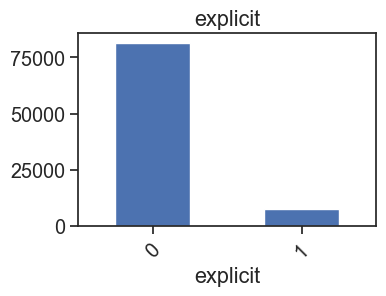

In [92]:
fig = plt.figure(figsize=(20,20))
fig_dims = (6,4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plot explicit
plt.subplot2grid(fig_dims, (0,2))
df['explicit'].value_counts().plot(kind='bar', title='explicit')
plt.xticks(rotation=45)

In [93]:
df_new = df.copy()

In [ ]:
df_new =df.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# fit and transform the 'album_type' column
df_new['album_type'] = label_encoder.fit_transform(df_new['album_type'])
df_new['genre'] = label_encoder.fit_transform(df_new['genre'])

In [95]:
X = df_new.drop(columns=['explicit'])
y = df_new['explicit']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, stratify = y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67005, 25), (22336, 25), (67005,), (22336,))

In [141]:
# PCA
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [291]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

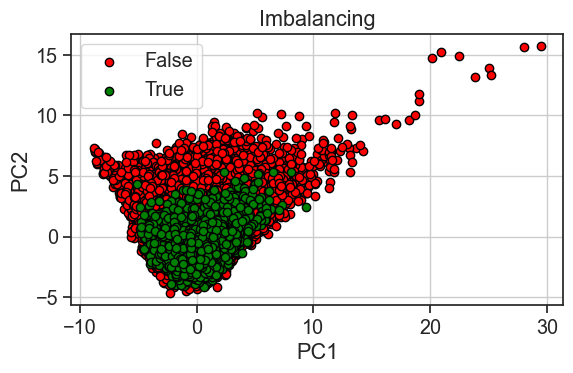

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

# filter data points based on target variable (y_res)
false_data = X_train_pca[y_train == 0]  # assume 0 represents "False" class
true_data = X_train_pca[y_train == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4))  
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Imbalancing")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1], dtype=int64), array([61198,  5807], dtype=int64)),
 (array([0, 1], dtype=int64), array([20400,  1936], dtype=int64)))

In [149]:
np.max(np.unique(y_train, return_counts=True)[1])/len(X_train_scaled)

0.9133348257592717

In [150]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from sklearn.dummy import DummyClassifier

In [151]:
clf = DummyClassifier()
clf.fit(X_train_scaled, y_train)

y_pred0 = clf.predict(X_test_scaled)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.913323782234957
F1-score [0.95469861 0.        ]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     20400
           1       0.00      0.00      0.00      1936

    accuracy                           0.91     22336
   macro avg       0.46      0.50      0.48     22336
weighted avg       0.83      0.91      0.87     22336



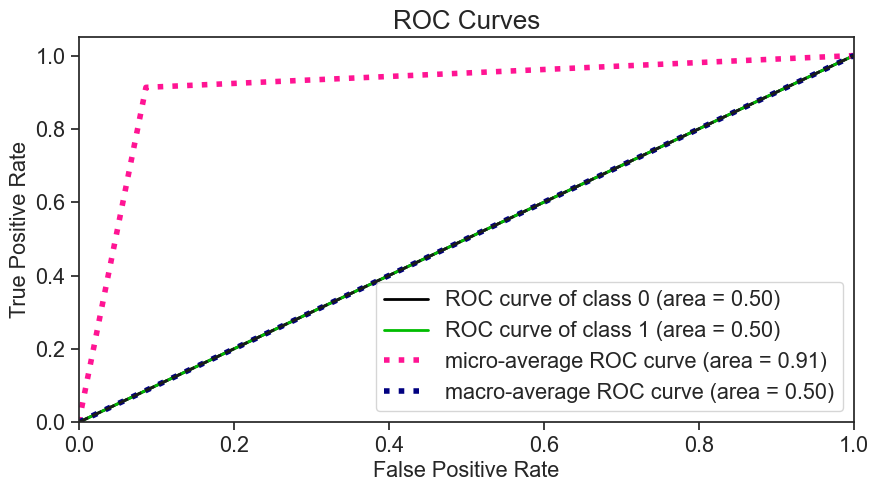

In [152]:
y_score = clf.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 

[11, 13, 15, 17, 19]


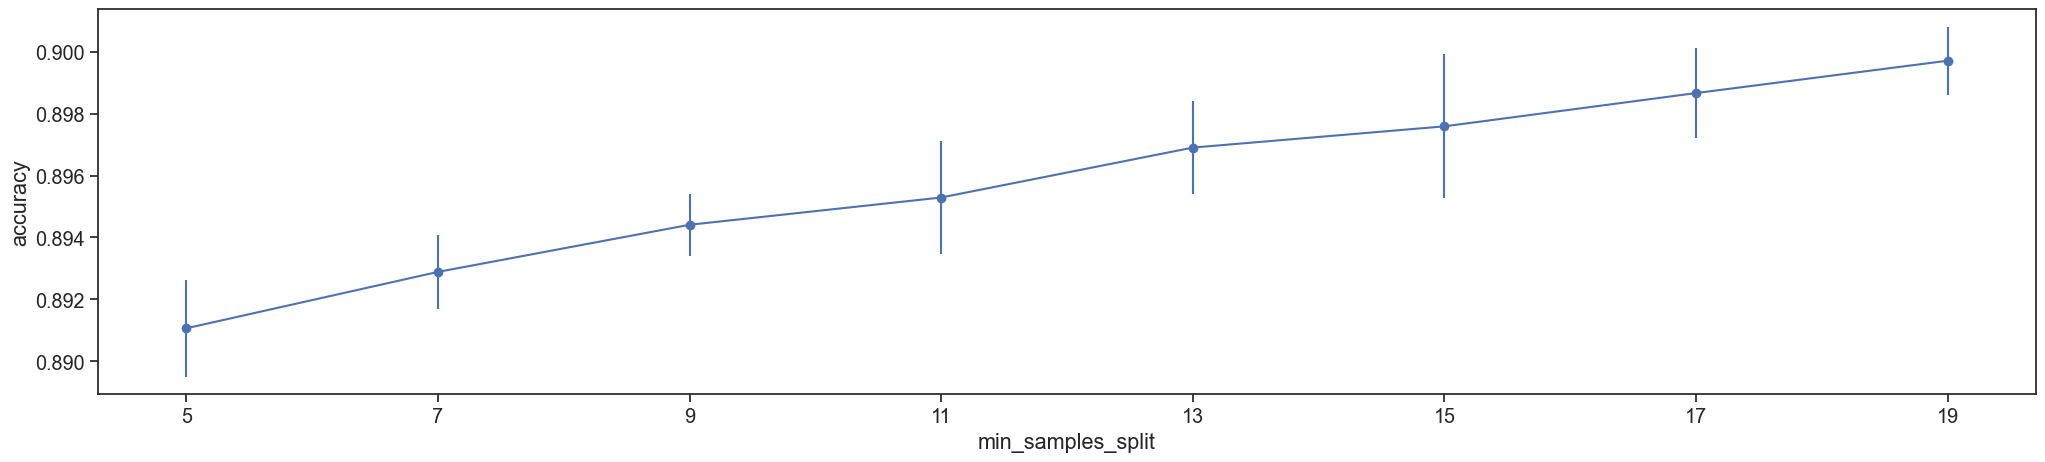

In [155]:
def split_param_graph(interval, train_X, train_y, cv):
  min_samples_splits = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for min_samples_split in min_samples_splits:
     dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
     cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
     avg_scores.append(np.mean(cross_val_scores))
     std_scores.append(np.std(cross_val_scores))
     avg_score = np.mean(cross_val_scores)
     std_score = np.std(cross_val_scores)
     scores.append((min_samples_split, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_split = sorted([t[0] for t in scores[:5]])
  print(range_split)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(min_samples_splits)), min_samples_splits)
  plt.xlabel("min_samples_split")
  plt.ylabel("accuracy")
  plt.show()

  return range_split

range_split = split_param_graph(interval=range(5, 20, 2), train_X=X_train_scaled, train_y=y_train, cv=5)

[15, 16, 17, 18, 19]


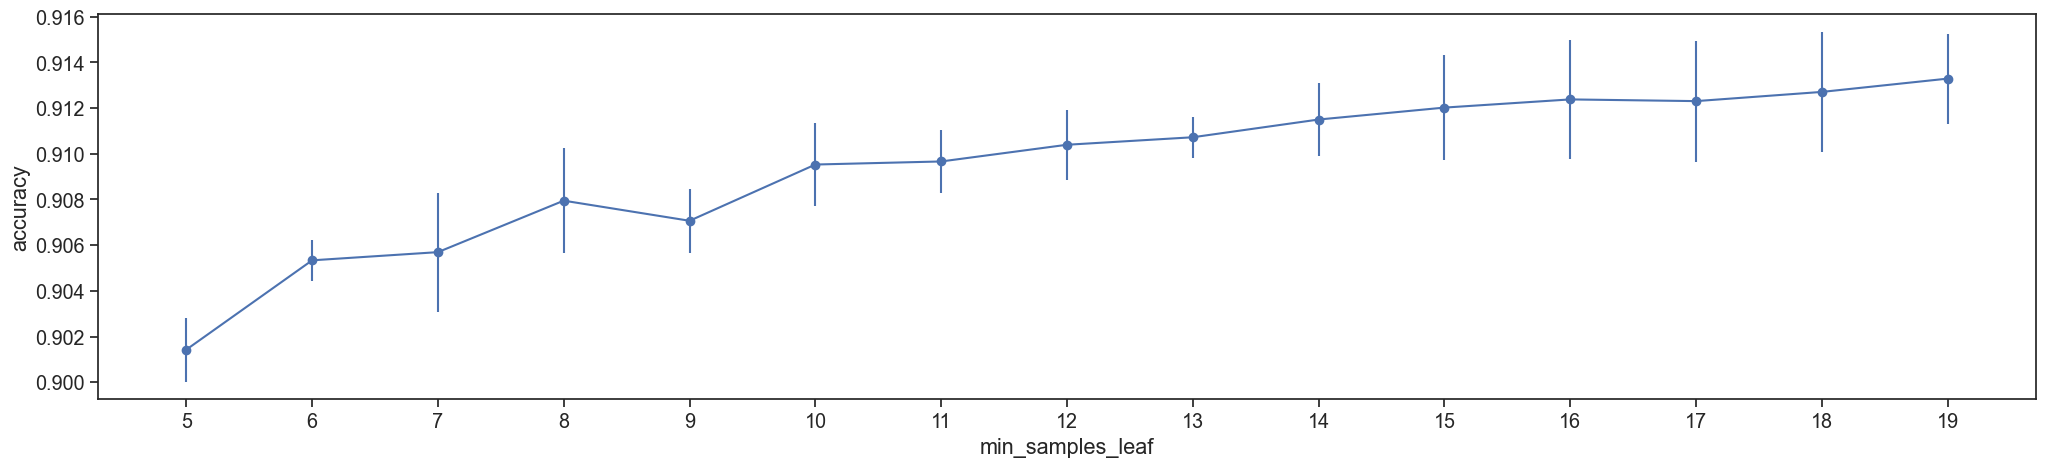

In [156]:
def leaf_param_graph(interval, train_X, train_y, cv):
  min_samples_leafs = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for min_samples_leaf in min_samples_leafs:
     dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
     cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
     avg_scores.append(np.mean(cross_val_scores))
     std_scores.append(np.std(cross_val_scores))
     avg_score = np.mean(cross_val_scores)
     std_score = np.std(cross_val_scores)
     scores.append((min_samples_leaf, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_leaf = sorted([t[0] for t in scores[:5]])
  print(range_leaf)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
  plt.xlabel("min_samples_leaf")
  plt.ylabel("accuracy")
  plt.show()

  return range_leaf

range_leaf = leaf_param_graph(interval=range(5, 20, 1), train_X=X_train_scaled, train_y=y_train, cv=5)

[6, 7, 8, 9, 10]


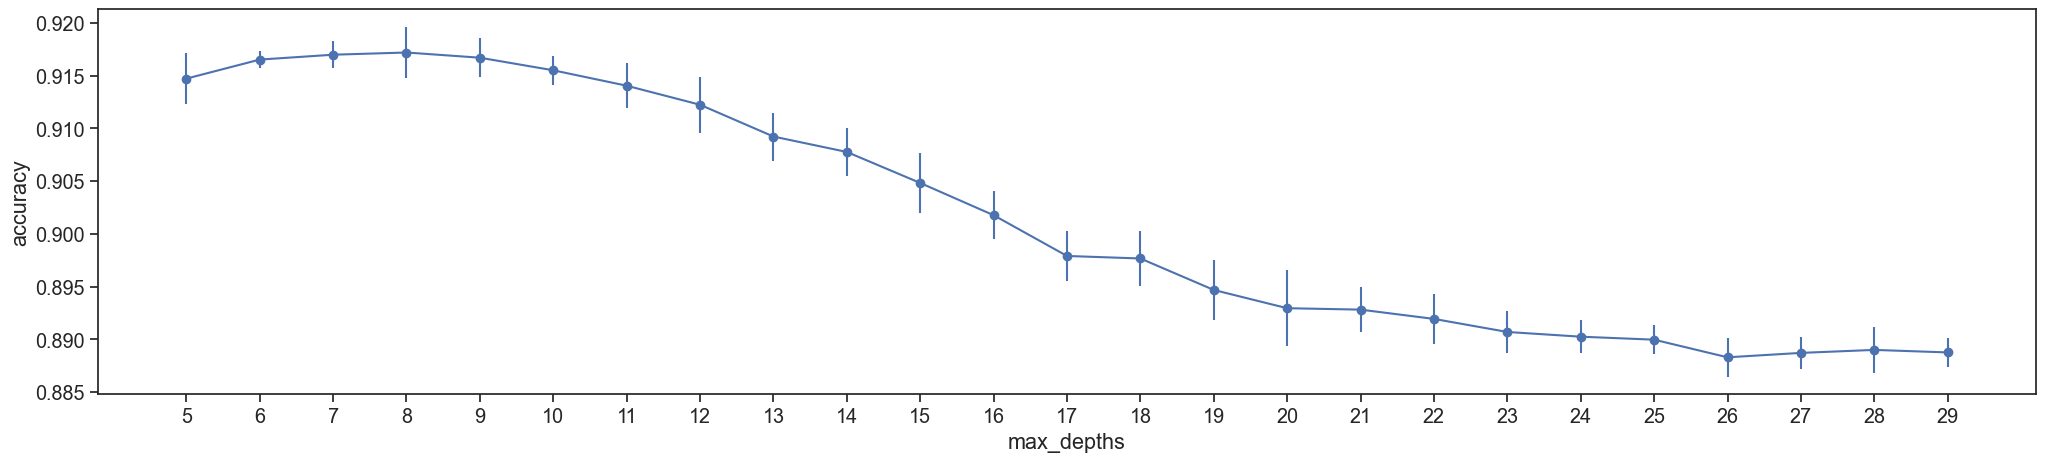

In [157]:
def depth_param_graph(interval, train_X, train_y, cv):
  max_depths = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for max_depth in max_depths:
      dt = DecisionTreeClassifier(max_depth=max_depth)
      cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
      avg_scores.append(np.mean(cross_val_scores))
      std_scores.append(np.std(cross_val_scores))
      avg_score = np.mean(cross_val_scores)
      std_score = np.std(cross_val_scores)
      scores.append((max_depth, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_depth = sorted([t[0] for t in scores[:5]])
  print(range_depth)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(max_depths)), max_depths)
  plt.xlabel("max_depths")
  plt.ylabel("accuracy")
  plt.show()

  return range_depth

range_depth = depth_param_graph(interval=range(5, 30, 1), train_X=X_train_scaled, train_y=y_train, cv=5)

In [158]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# TODO: implement tqdm

param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)

In [159]:
random_search.fit(X_train_scaled, y_train)
dt = random_search.best_estimator_

Fitting 50 folds for each of 10 candidates, totalling 500 fits


In [243]:
dt

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=5,
                       min_samples_split=11)

In [161]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=19, min_samples_split=13, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred0 = clf.predict(X_test_scaled)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9179799426934098
F1-score [0.95655885 0.2672    ]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     20400
           1       0.59      0.17      0.27      1936

    accuracy                           0.92     22336
   macro avg       0.76      0.58      0.61     22336
weighted avg       0.90      0.92      0.90     22336



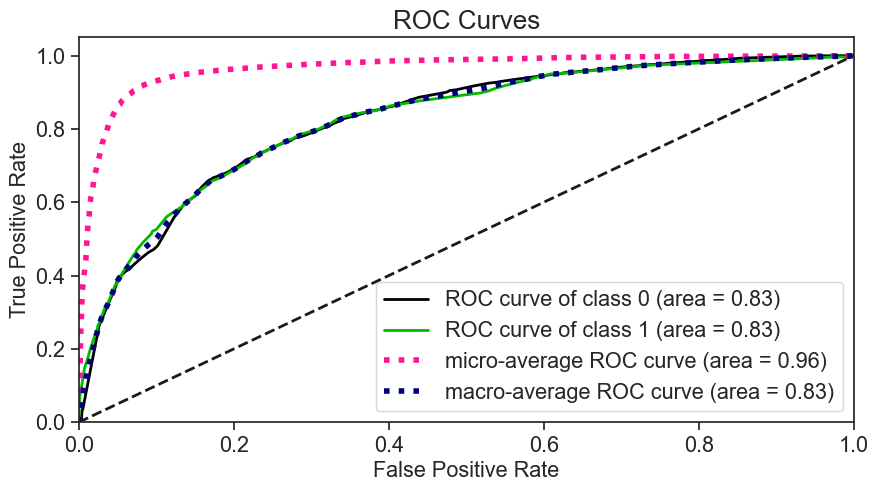

In [162]:
y_score = clf.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()

In [163]:
# storing class 1 ROC curve for successive comparisons
y_score = clf.predict_proba(X_test_scaled)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

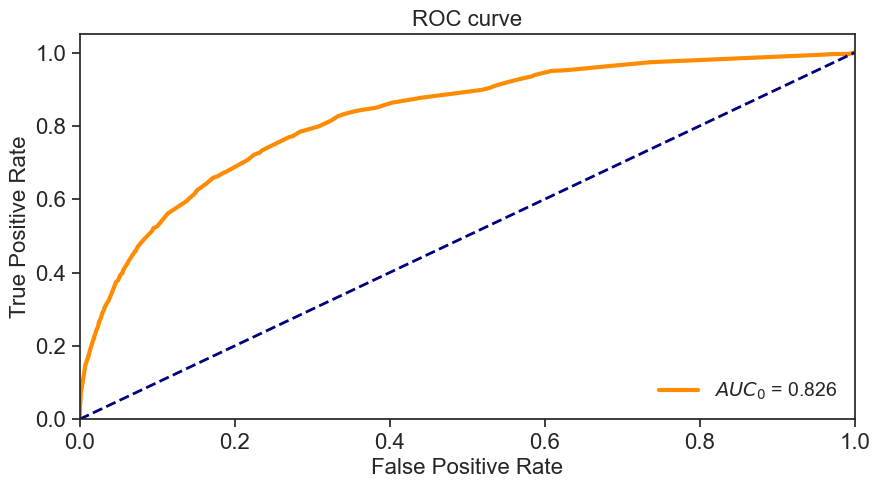

In [164]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [165]:
def plot_ROC_comparison(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
    plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.figure(figsize=(6, 4))
    plt.show()

In [166]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.figure(figsize=(5, 2))
    plt.show()

In [167]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)
print(X_train_scaled.shape, X_pca.shape)

(67005, 25) (67005, 2)


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca_tl = pca.transform(X_tl)

# filter data points based on target variable (y_res)
false_data = X_pca_tl[y_tl == 0]  # assume 0 represents "False" class
true_data = X_pca_tl[y_tl == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4))  
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Undersampling

In [114]:
!pip install imblearn

In [115]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter

## RandomUnderSampler

In [253]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [254]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5807, 1: 5807})


[6, 7, 8, 9, 10]


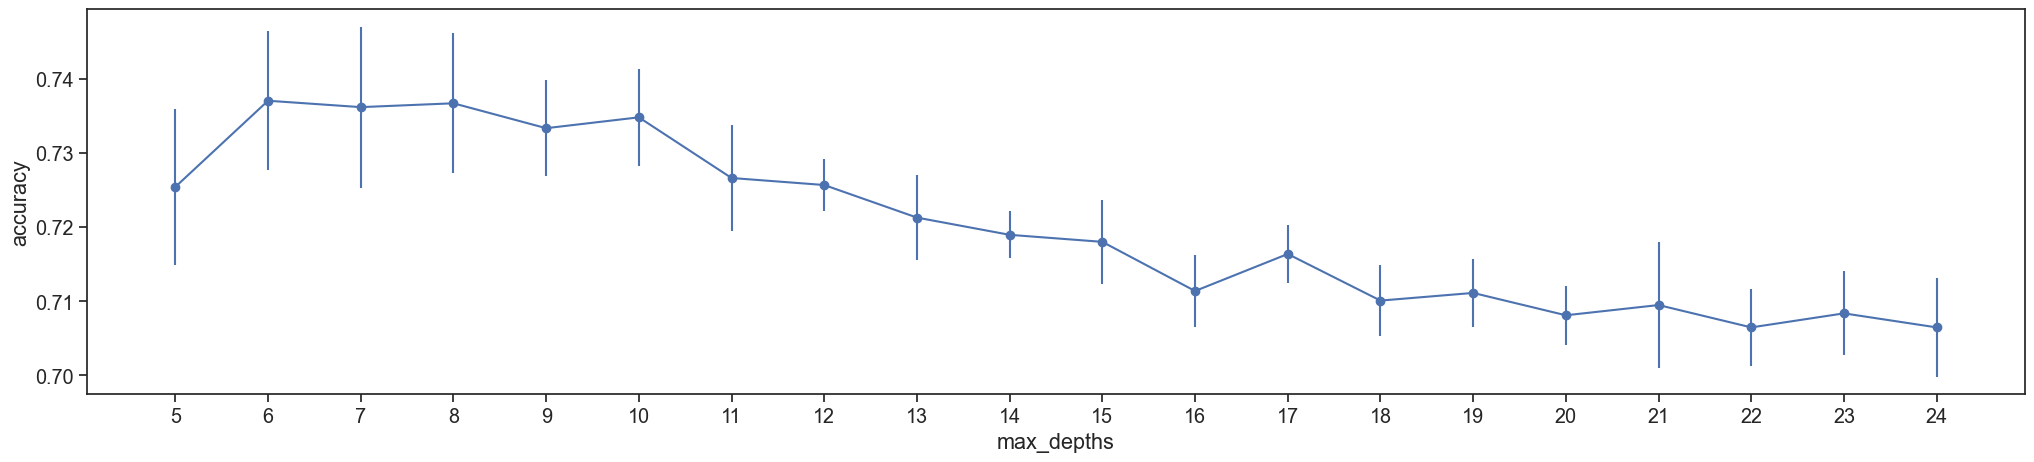

[13, 15, 17, 18, 19]


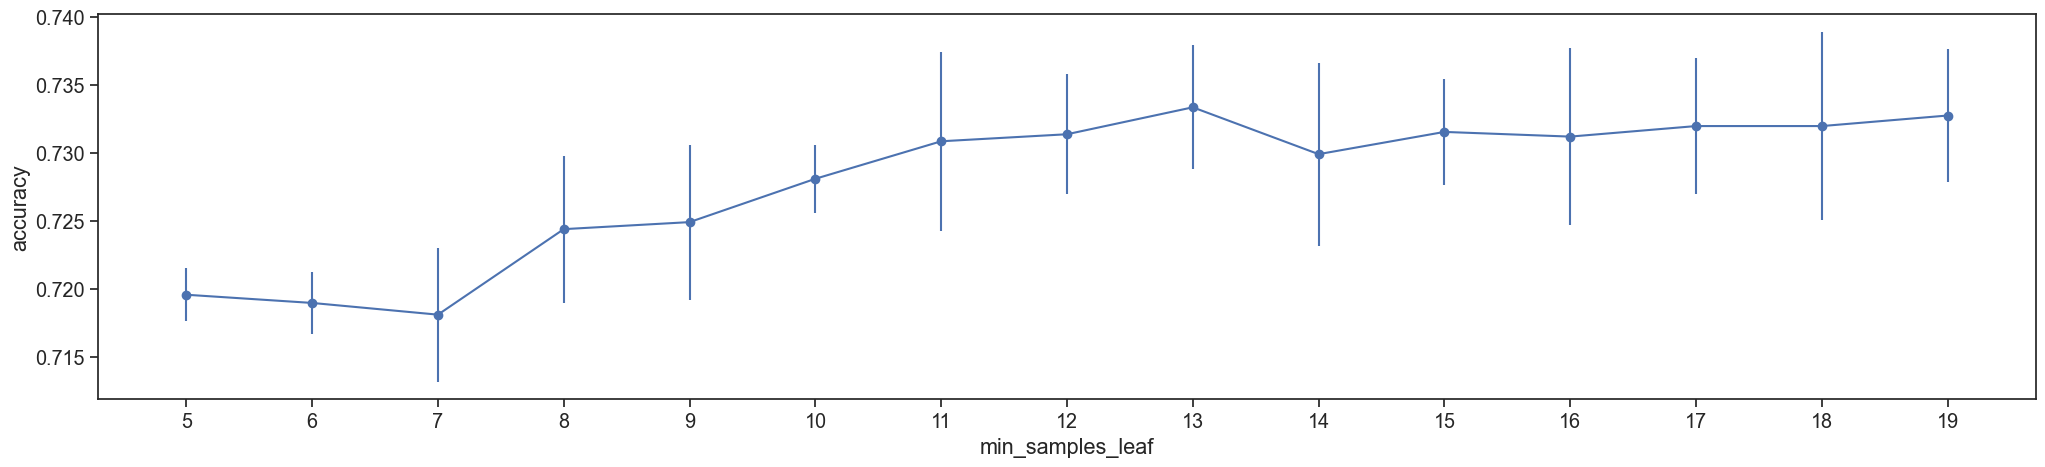

[9, 17, 25, 27, 29]


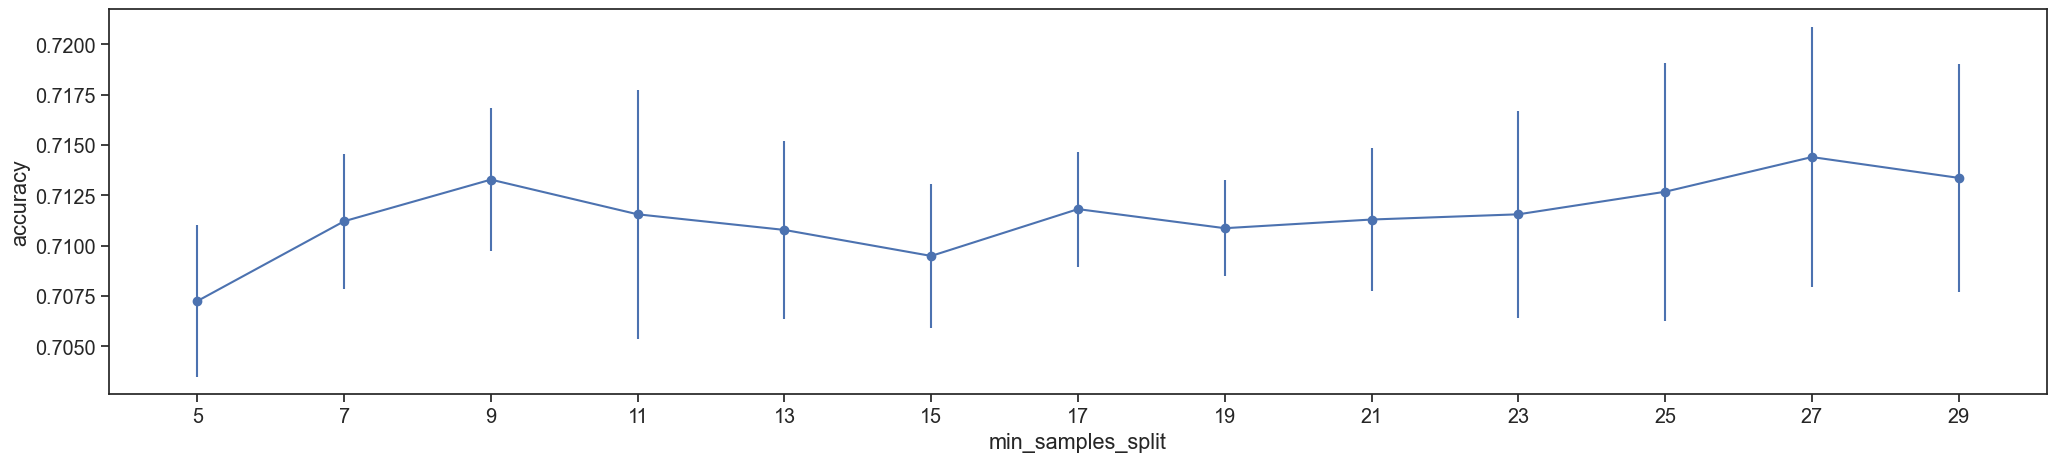

In [195]:
range_depth = depth_param_graph(interval=range(5, 25, 1), train_X=X_res, train_y=y_res, cv=5)
range_leaf = leaf_param_graph(interval=range(5, 20, 1), train_X=X_res, train_y=y_res, cv=5)
range_split = split_param_graph(interval=range(5, 30, 2), train_X=X_res, train_y=y_res, cv=5)

In [197]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# TODO: implement tqdm

param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)


In [198]:
random_search.fit(X_res, y_res)
dt = random_search.best_estimator_

Fitting 50 folds for each of 10 candidates, totalling 500 fits


In [199]:
dt

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=19,
                       min_samples_split=29)

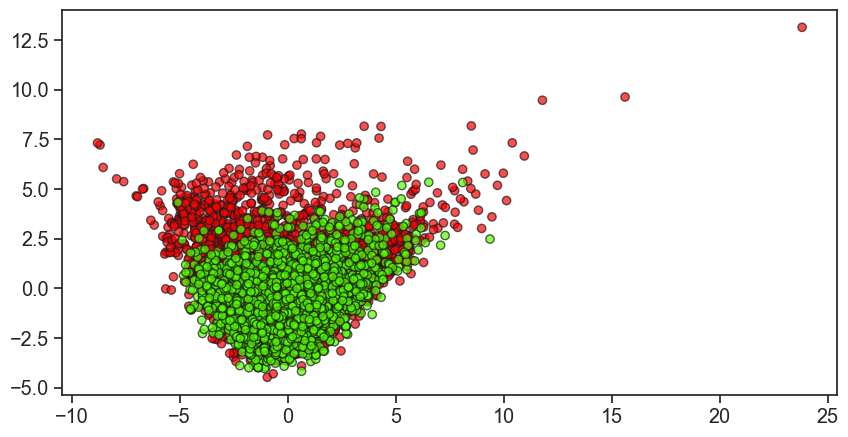

<Figure size 500x200 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [255]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)
plt.figure(figsize=(6, 4))

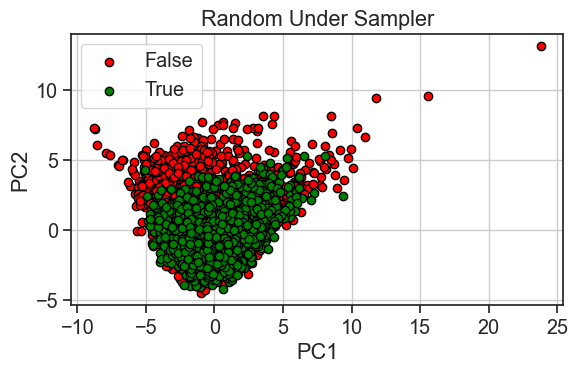

In [ ]:
import matplotlib.pyplot as plt

# perform PCA 
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_res)

# filter data points based on target variable (y_res)
false_data = X_pca[y_res == 0]  # assume 0 represents "False" class
true_data = X_pca[y_res == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4)) 
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Random Under Sampler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy 0.711631446991404
F1-score [0.81726104 0.31660477]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     20400
           1       0.20      0.77      0.32      1936

    accuracy                           0.71     22336
   macro avg       0.58      0.74      0.57     22336
weighted avg       0.90      0.71      0.77     22336



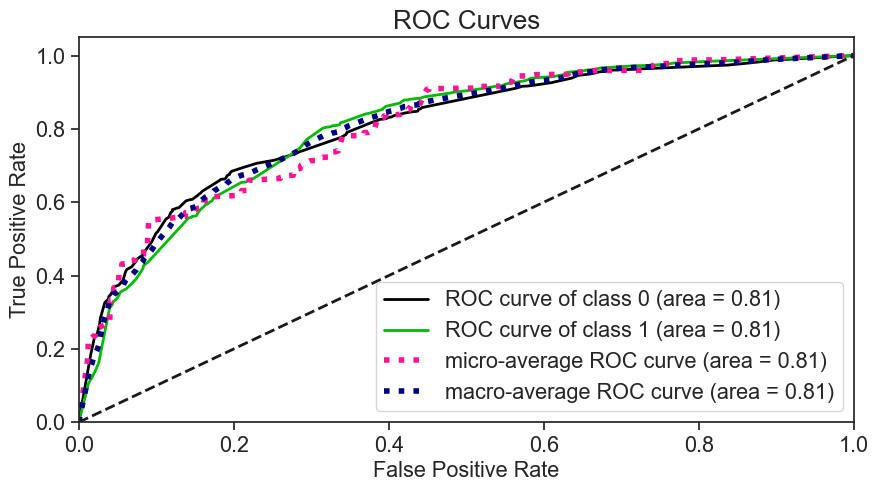

<Figure size 600x400 with 0 Axes>

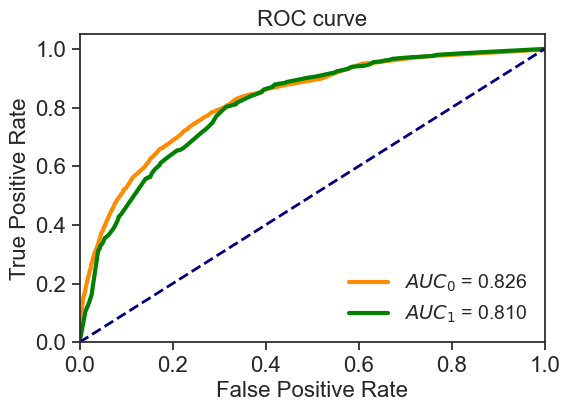

<Figure size 600x400 with 0 Axes>

In [203]:
# fit
clf = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=19,
                       min_samples_split=29)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()
plt.figure(figsize=(6, 4))
# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plt.figure(figsize=(6, 4))
plot_ROC_comparison(fpr, tpr)

## CondensedNearestNeighbour

In [119]:
import warnings
warnings.simplefilter("ignore")

In [120]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=8)
X_cnn, y_cnn = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_cnn))


KeyboardInterrupt



In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_cnn)
plot_pca(X_pca, y_cnn)

In [ ]:
# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_cnn, y_cnn)

# predict
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()
plt.figure(figsize=(6, 4))
# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

## Tomek's Link

In [265]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [266]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_tl))

Resampled dataset shape Counter({0: 59927, 1: 5807})


[6, 7, 8, 9, 10]


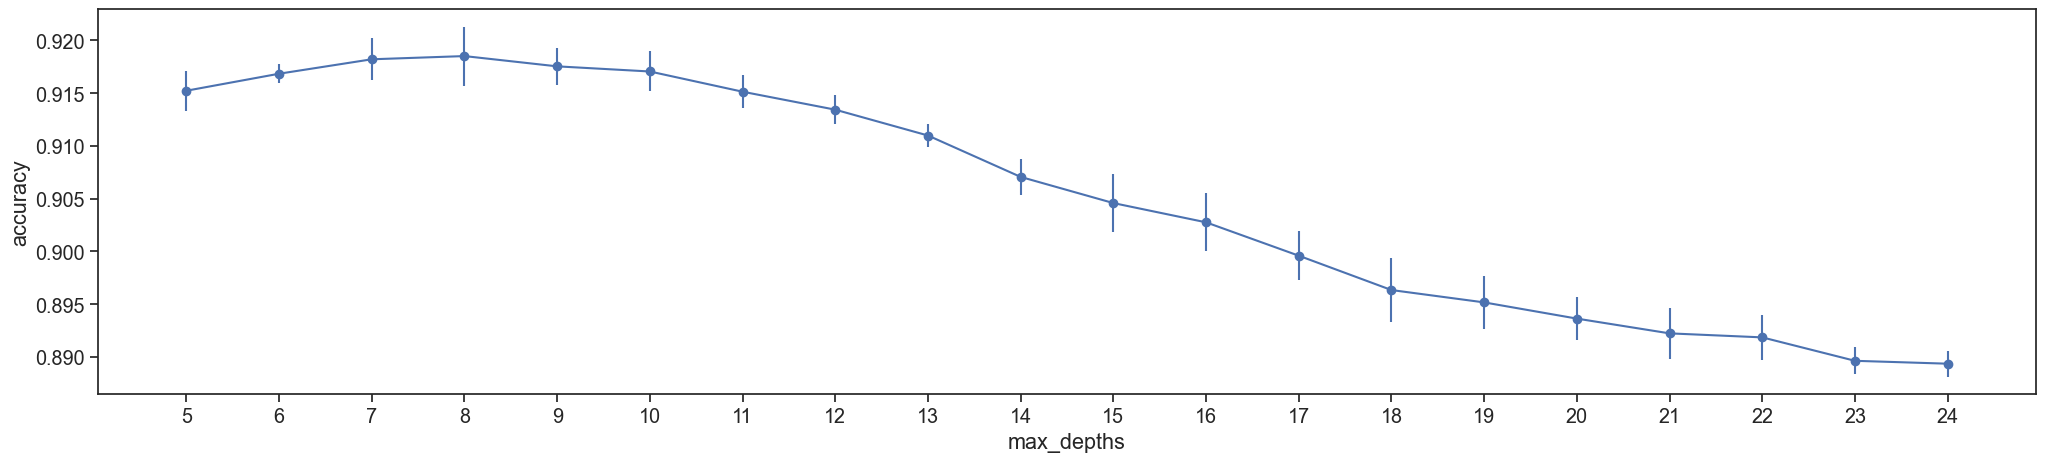

[15, 16, 17, 18, 19]


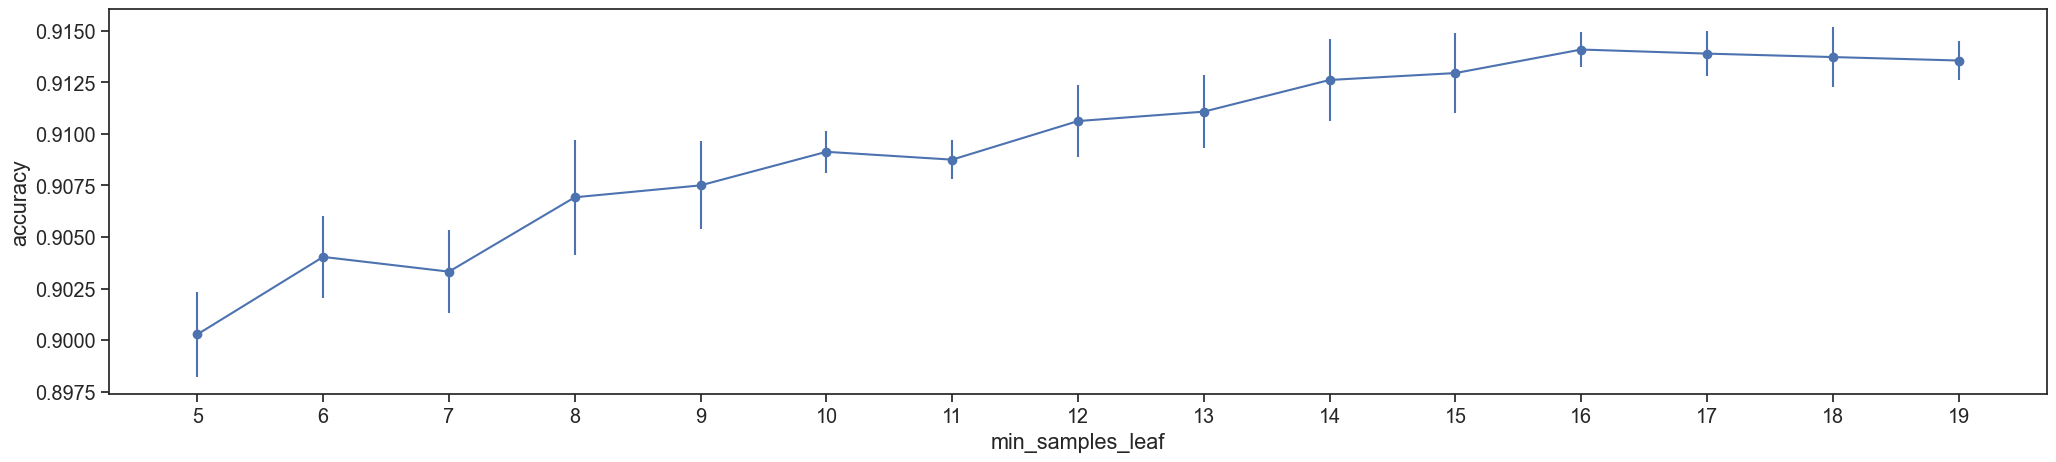

[21, 23, 25, 27, 29]


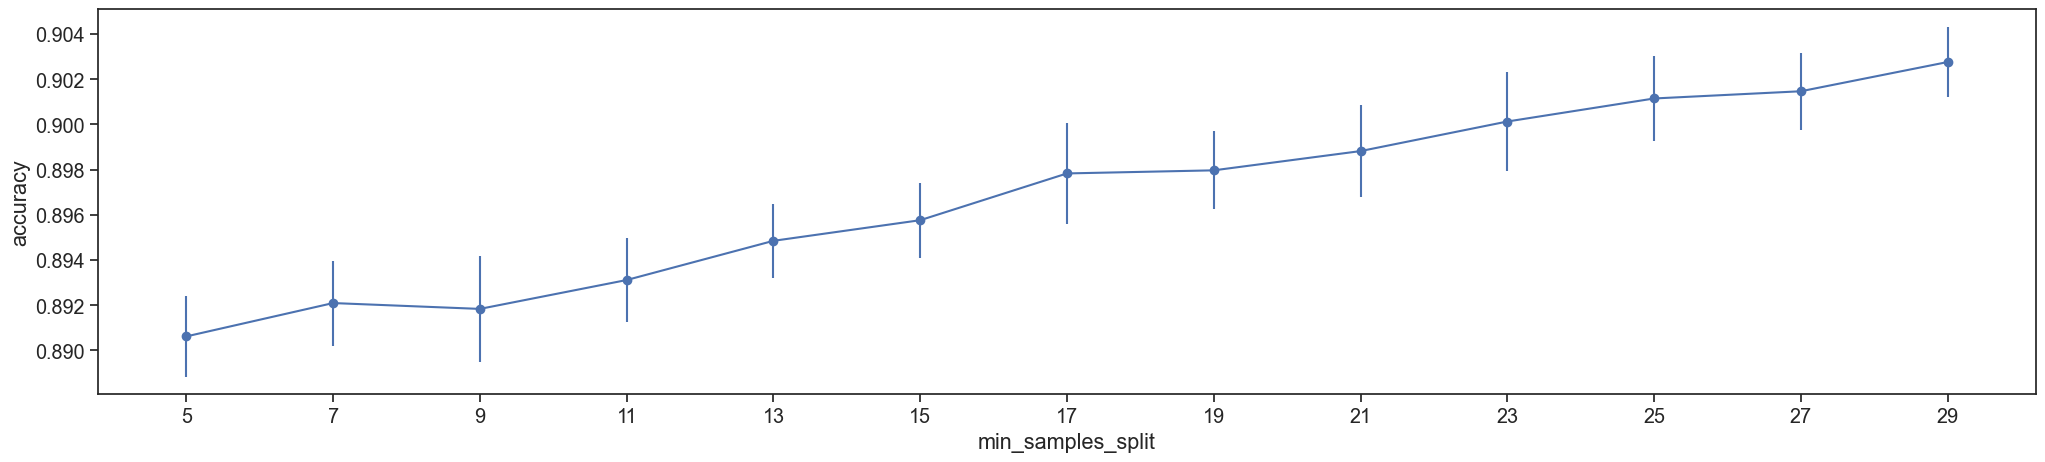

In [204]:
range_depth = depth_param_graph(interval=range(5, 25, 1), train_X=X_tl, train_y=y_tl, cv=5)
range_leaf = leaf_param_graph(interval=range(5, 20, 1), train_X=X_tl, train_y=y_tl, cv=5)
range_split = split_param_graph(interval=range(5, 30, 2), train_X=X_tl, train_y=y_tl, cv=5)

In [205]:
param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)
random_search.fit(X_tl, y_tl)
dt = random_search.best_estimator_
dt

Fitting 50 folds for each of 10 candidates, totalling 500 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=18, min_samples_split=25)

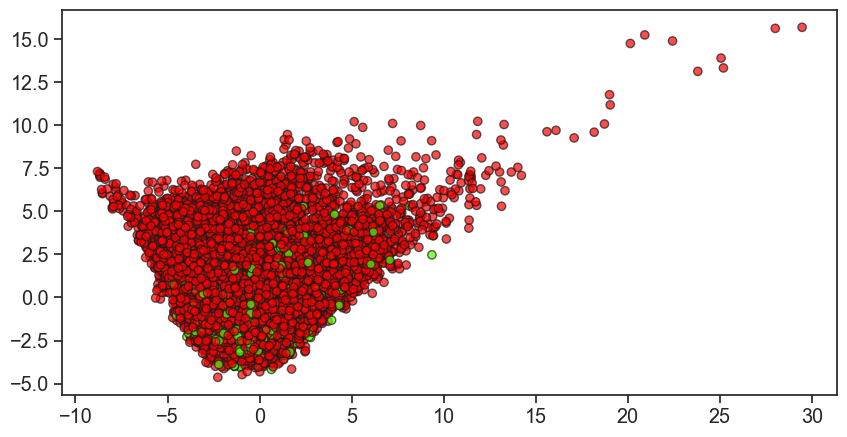

<Figure size 500x200 with 0 Axes>

In [268]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca_tl = pca.transform(X_tl)
plot_pca(X_pca_tl, y_tl)

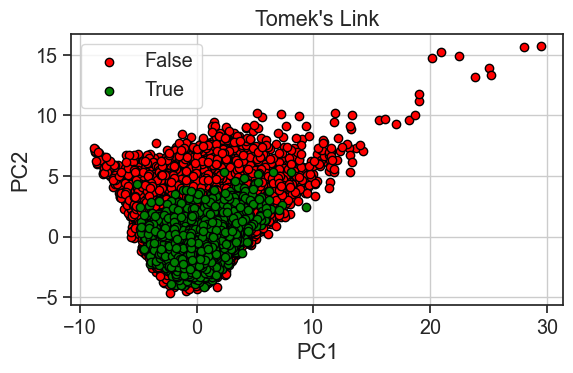

In [ ]:
import matplotlib.pyplot as plt
# perform PCA

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca_tl = pca.transform(X_tl)

# filter data points based on target variable (y_res)
false_data = X_pca_tl[y_tl == 0]  # assume 0 represents "False" class
true_data = X_pca_tl[y_tl == 1]  # assume 1 represents "True" class


plt.figure(figsize=(6, 4))  
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Tomek's Link")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy 0.9179351719197708
F1-score [0.95616406 0.35841792]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     20400
           1       0.56      0.26      0.36      1936

    accuracy                           0.92     22336
   macro avg       0.74      0.62      0.66     22336
weighted avg       0.90      0.92      0.90     22336



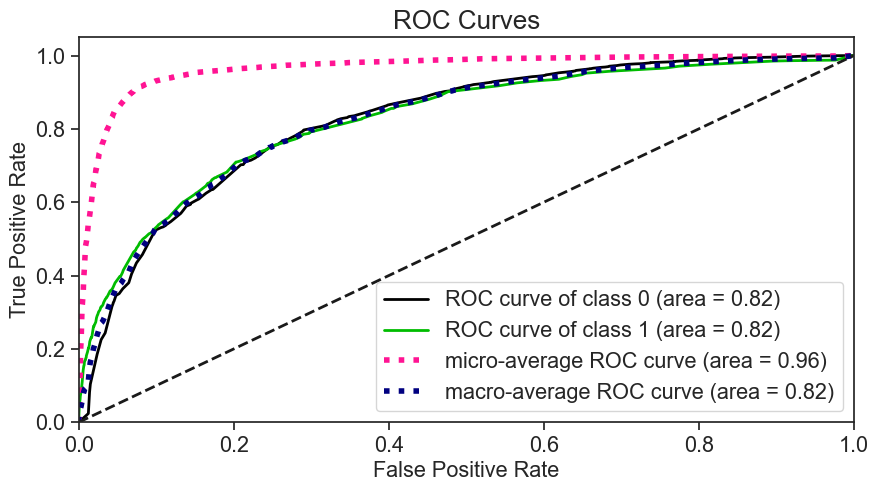

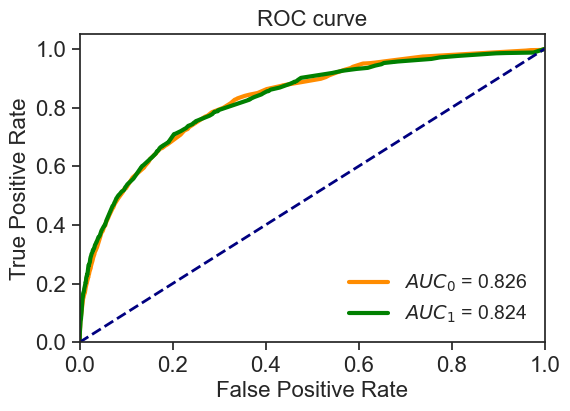

<Figure size 600x400 with 0 Axes>

In [207]:
# fit 
clf_tl = DecisionTreeClassifier(max_depth=9, min_samples_leaf=18, min_samples_split=25, random_state=42)
clf_tl.fit(X_tl, y_tl)

# predict
y_pred = clf_tl.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_tl.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()
plt.figure(figsize=(6, 4))
# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

## Edited Nearest Neighbors

In [269]:
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_enn))

Resampled dataset shape Counter({0: 52359, 1: 5807})


[6, 7, 8, 9, 10]


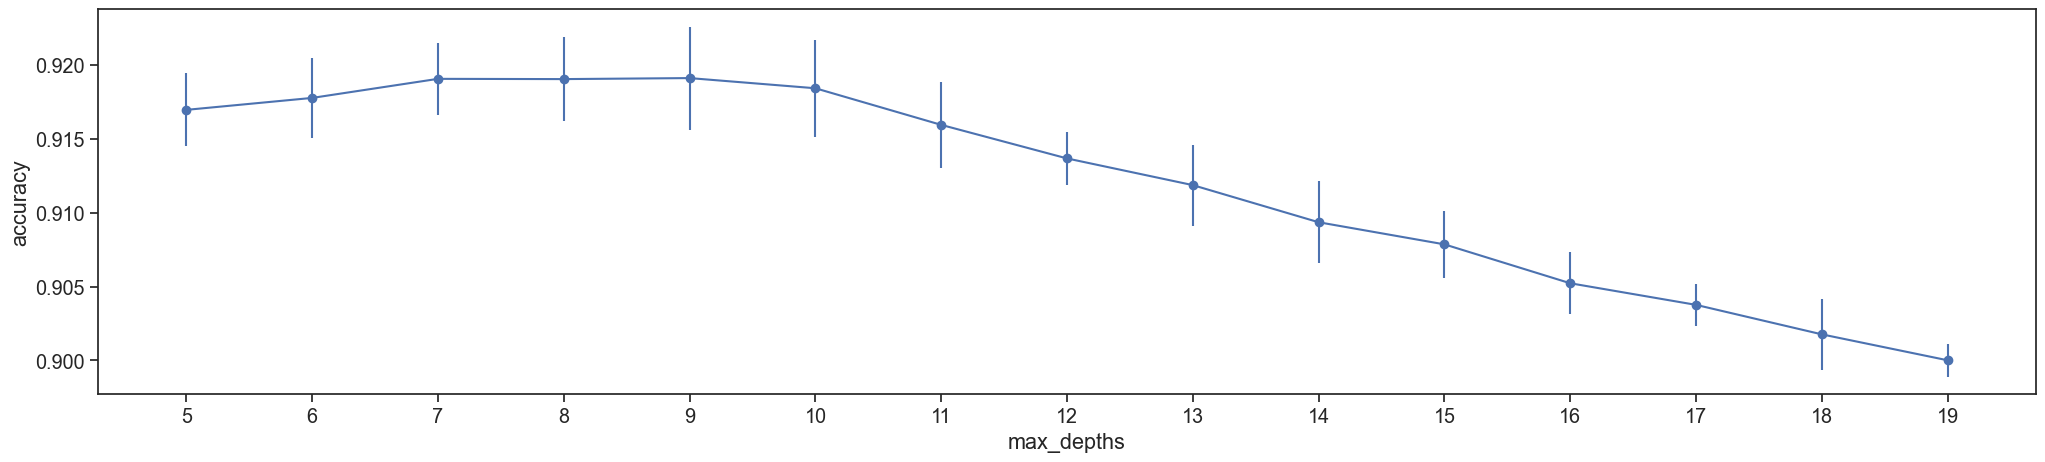

[14, 16, 17, 18, 19]


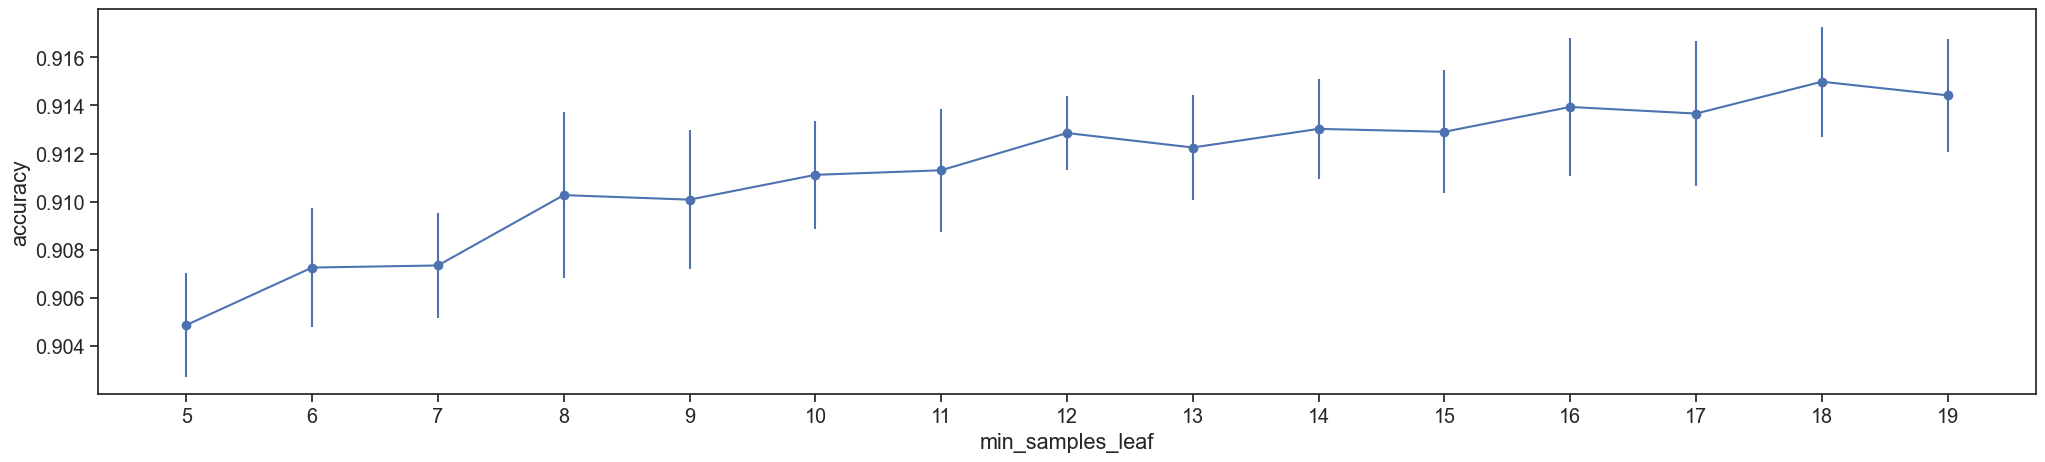

[21, 23, 25, 27, 29]


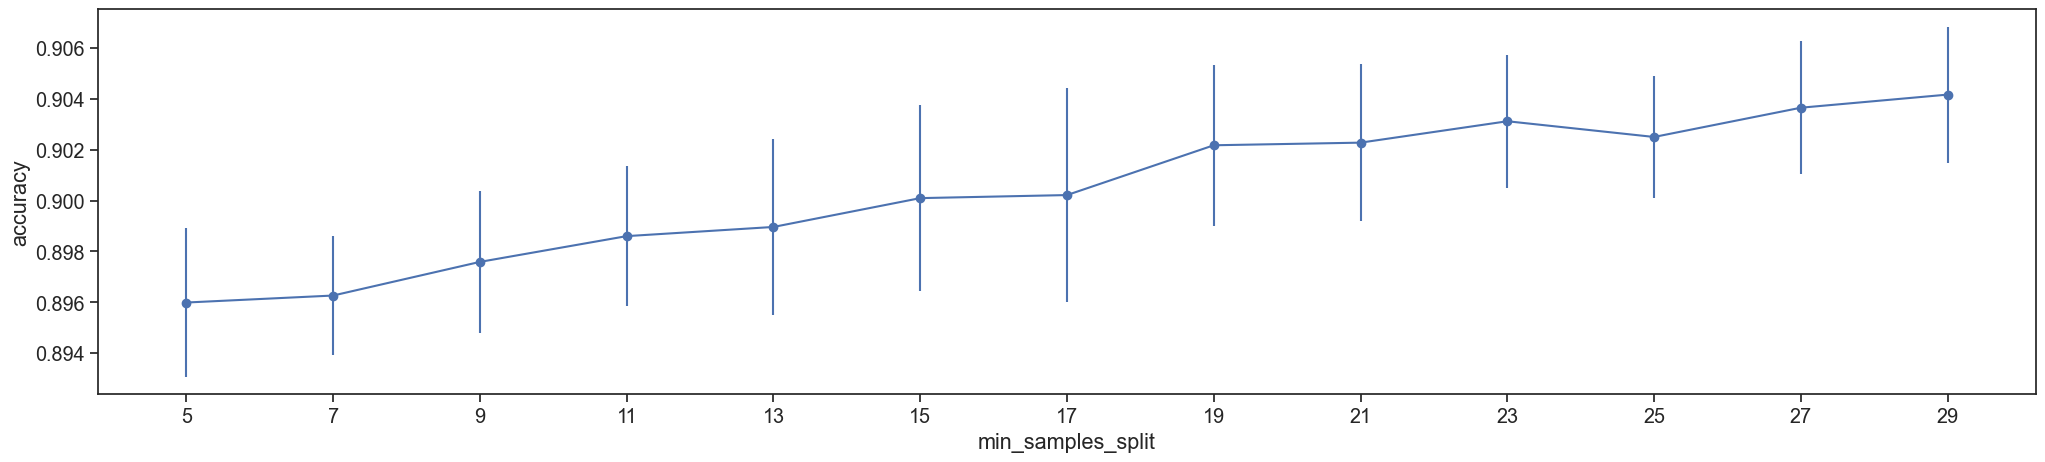

In [210]:
range_depth = depth_param_graph(interval=range(5, 20, 1), train_X=X_enn, train_y=y_enn, cv=5)
range_leaf = leaf_param_graph(interval=range(5, 20, 1), train_X=X_enn, train_y=y_enn, cv=5)
range_split = split_param_graph(interval=range(5, 30, 2), train_X=X_enn, train_y=y_enn, cv=5)

In [212]:
param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)
random_search.fit(X_enn, y_enn)
dt = random_search.best_estimator_
dt

Fitting 50 folds for each of 10 candidates, totalling 500 fits


DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=23)

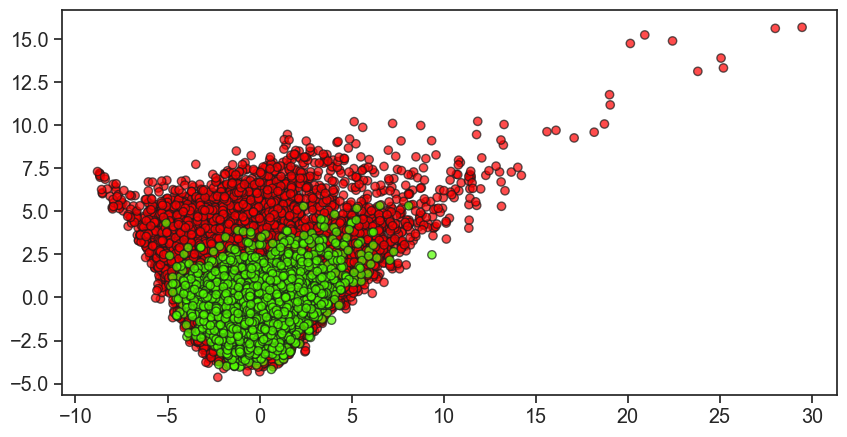

<Figure size 500x200 with 0 Axes>

In [270]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca_enn = pca.transform(X_enn)
plot_pca(X_pca_enn, y_enn)

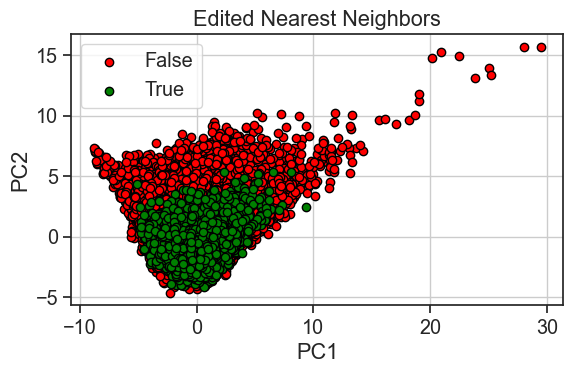

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca_enn = pca.transform(X_enn)

# filter data points based on target variable (y_res)
false_data = X_pca_enn[y_enn == 0]  # assume 0 represents "False" class
true_data = X_pca_enn[y_enn == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4))  
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Edited Nearest Neighbors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy 0.9079065186246418
F1-score [0.95025754 0.38023501]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     20400
           1       0.46      0.33      0.38      1936

    accuracy                           0.91     22336
   macro avg       0.70      0.64      0.67     22336
weighted avg       0.90      0.91      0.90     22336



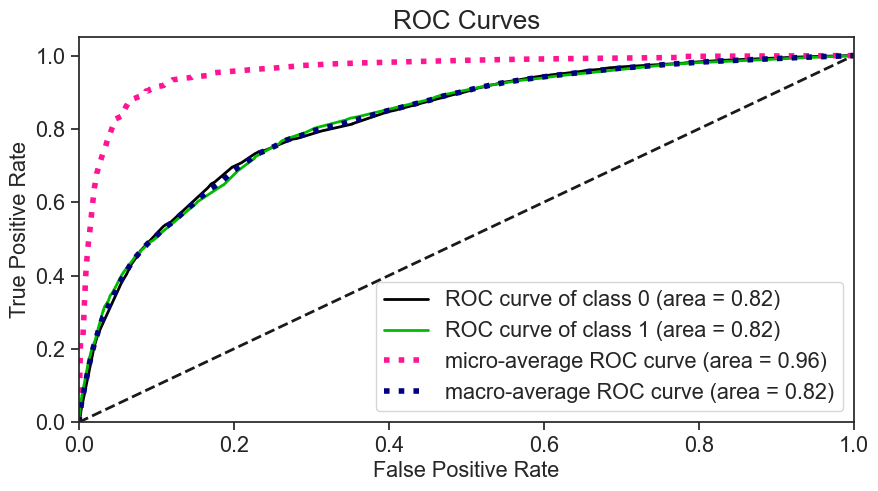

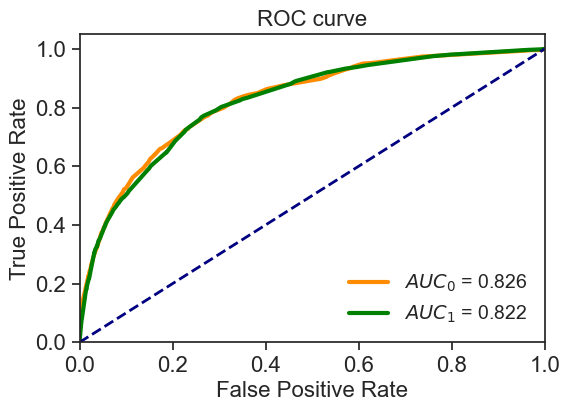

<Figure size 600x400 with 0 Axes>

In [217]:
# fit
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=23, random_state=42)
clf.fit(X_enn, y_enn)

# predict
y_pred = clf.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()
plt.figure(figsize=(6, 4))
# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

## Cluster Centroids

In [275]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [276]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5807, 1: 5807})


[6, 7, 8, 9, 10]


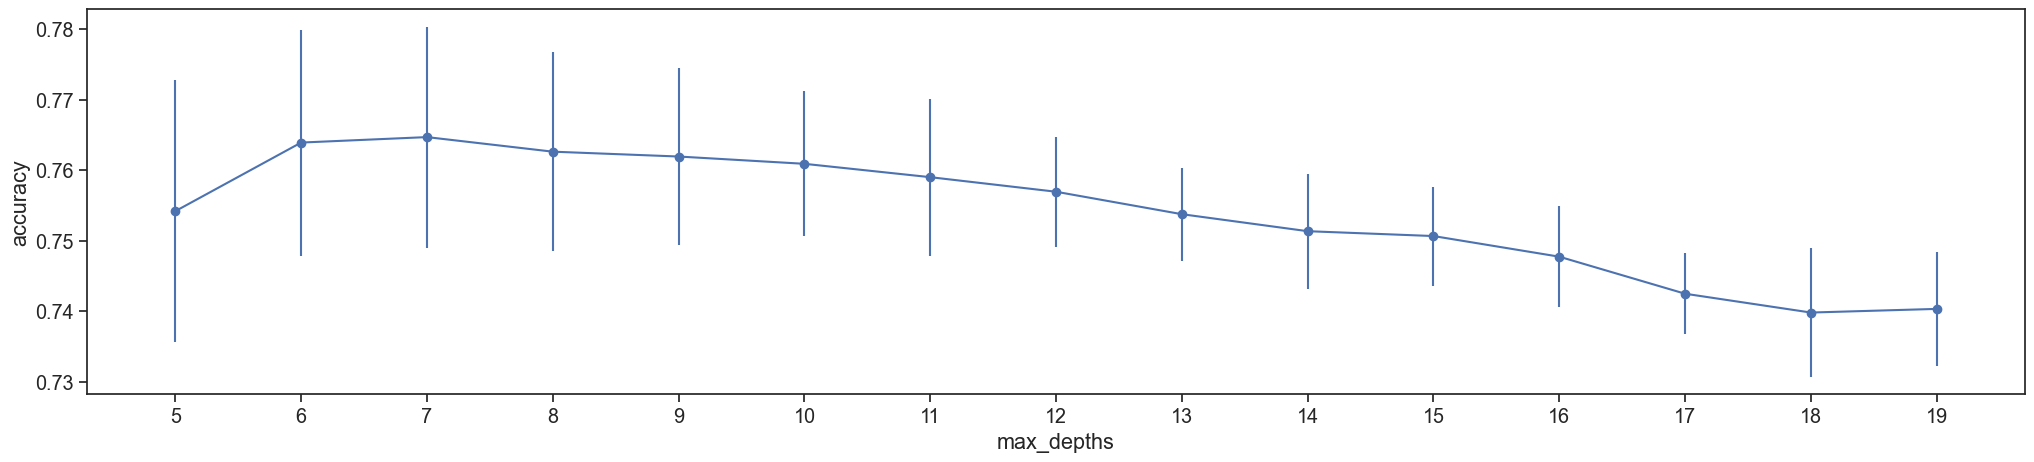

[13, 14, 15, 18, 19]


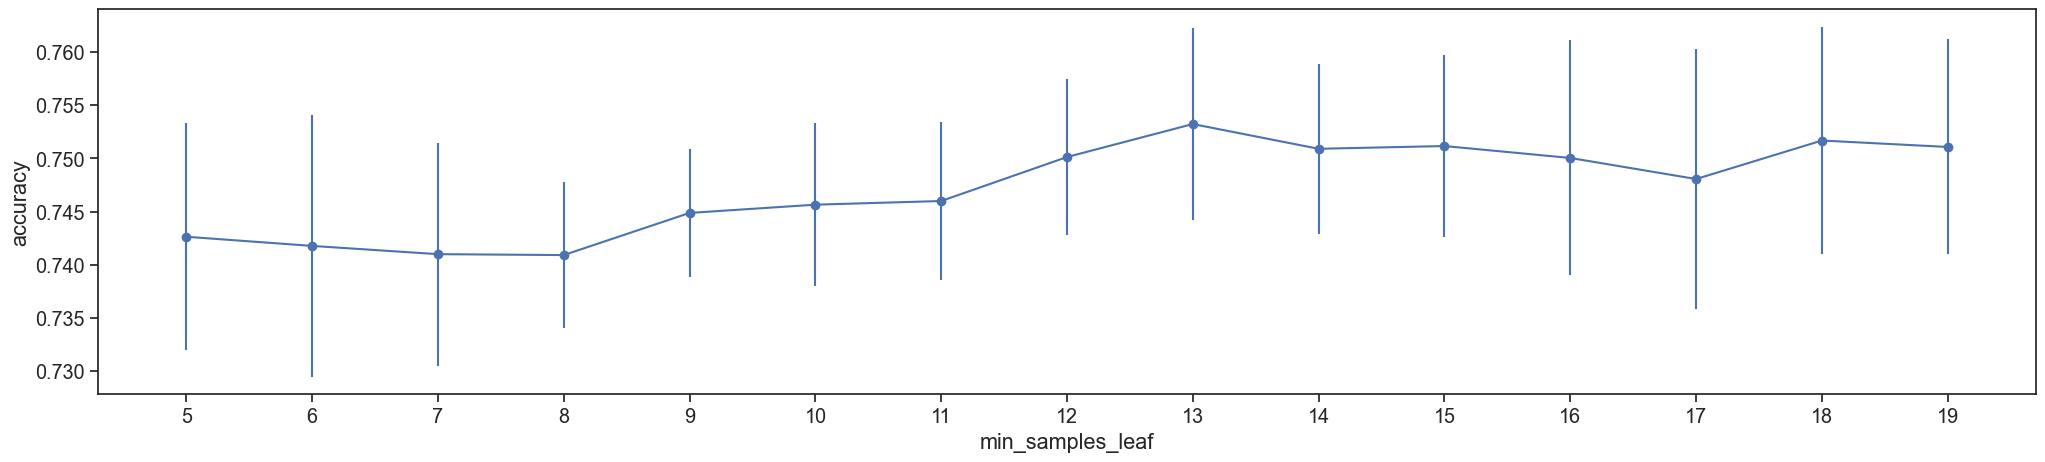

[7, 23, 25, 27, 29]


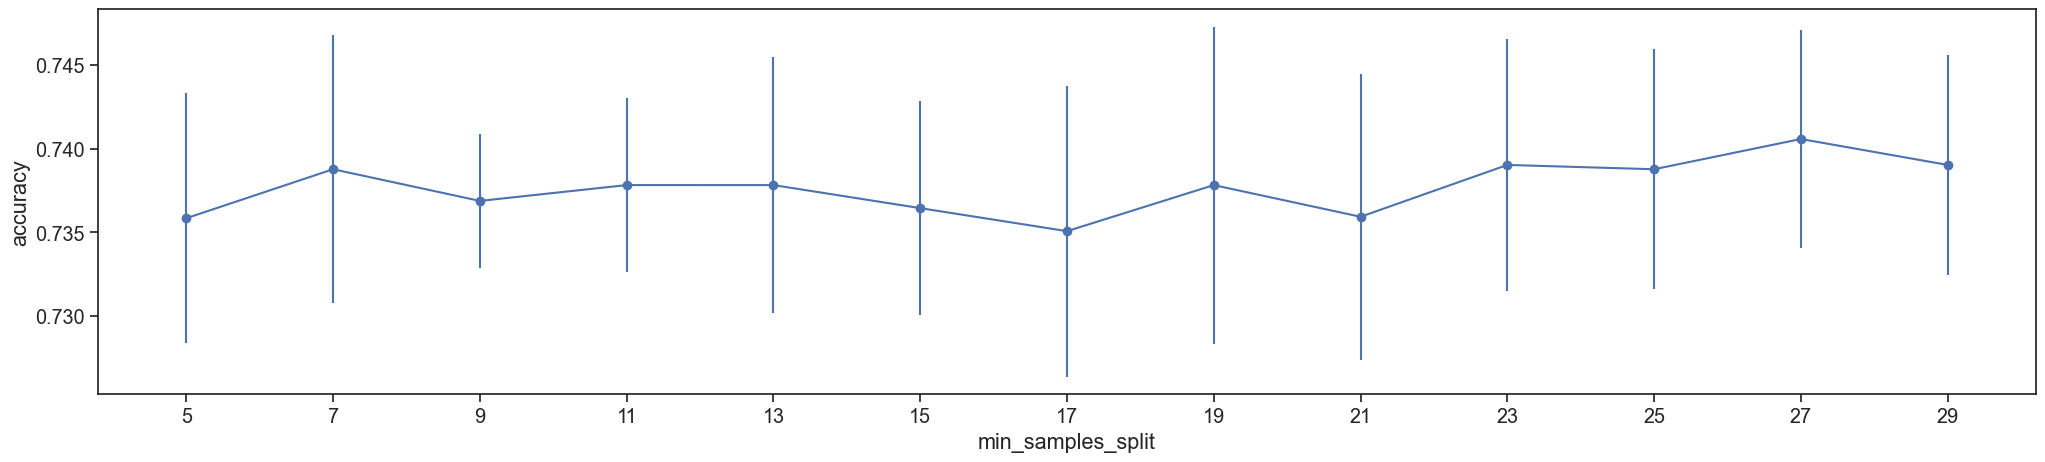

In [249]:
range_depth = depth_param_graph(interval=range(5, 20, 1), train_X=X_res, train_y=y_res, cv=5)
range_leaf = leaf_param_graph(interval=range(5, 20, 1), train_X=X_res, train_y=y_res, cv=5)
range_split = split_param_graph(interval=range(5, 30, 2), train_X=X_res, train_y=y_res, cv=5)

In [250]:
param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)
random_search.fit(X_res, y_res)
dt = random_search.best_estimator_
dt

Fitting 50 folds for each of 10 candidates, totalling 500 fits


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=18,
                       min_samples_split=29)

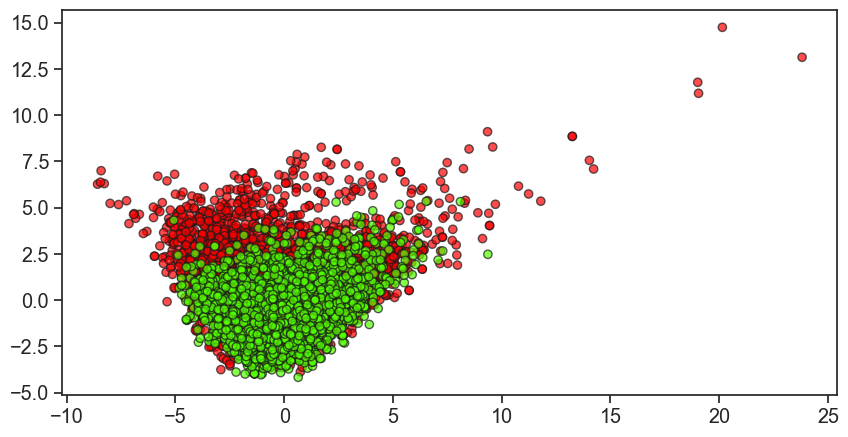

<Figure size 500x200 with 0 Axes>

In [277]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

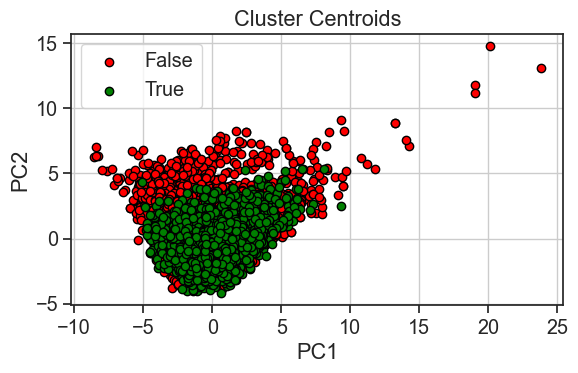

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_res)

# filter data points based on target variable (y_res)
false_data = X_pca[y_res == 0]  # assume 0 represents "False" class
true_data = X_pca[y_res == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4))
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Cluster Centroids")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy 0.7139147564469914
F1-score [0.81891861 0.31905371]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     20400
           1       0.20      0.77      0.32      1936

    accuracy                           0.71     22336
   macro avg       0.59      0.74      0.57     22336
weighted avg       0.90      0.71      0.78     22336



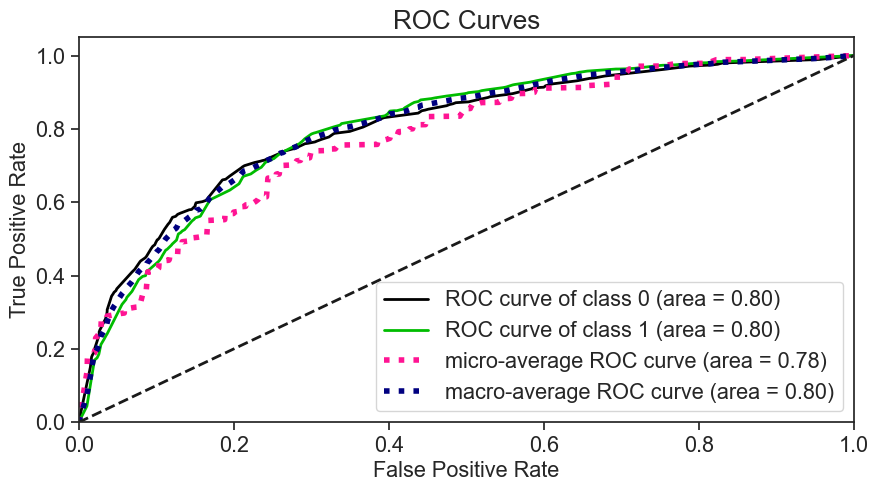

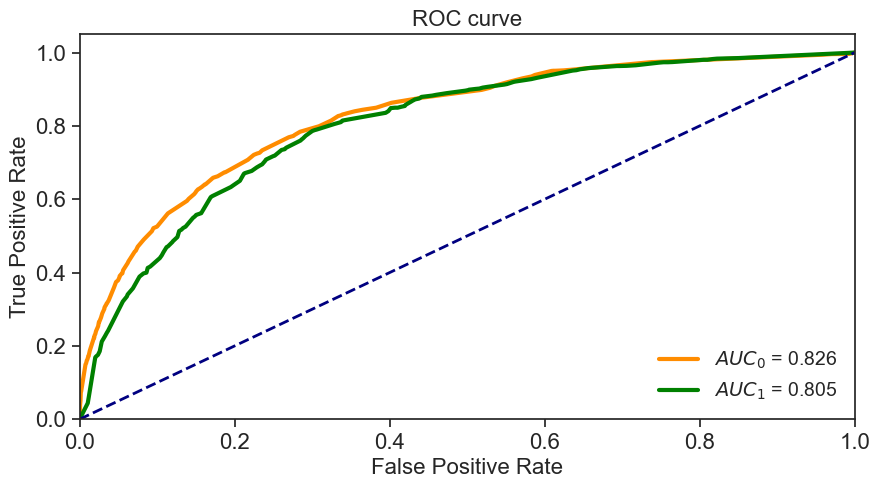

<Figure size 600x400 with 0 Axes>

In [252]:
# fit
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=18,
                       min_samples_split=29, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

# Oversampling

## RandomOverSampler

In [280]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [281]:
over_sample = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_over, y_over = over_sample.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 61198, 1: 61198})


[15, 16, 17, 18, 19]


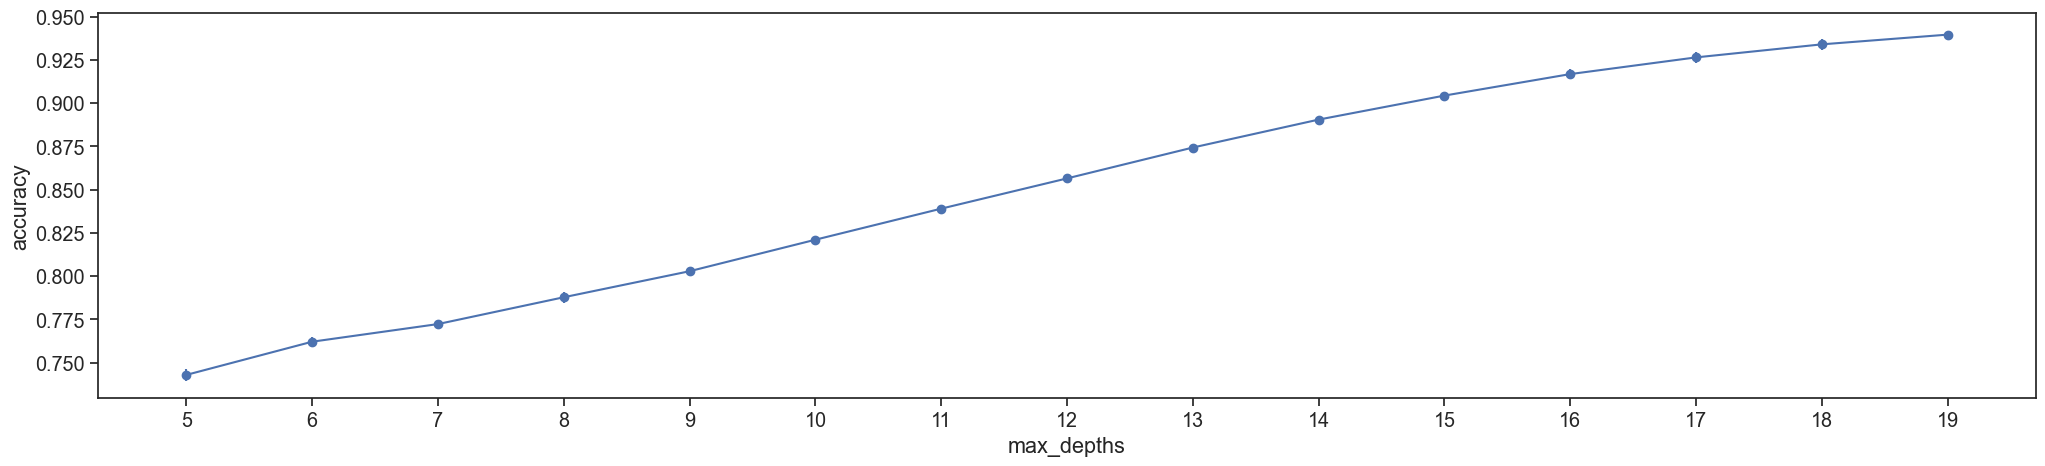

[5, 6, 7, 8, 9]


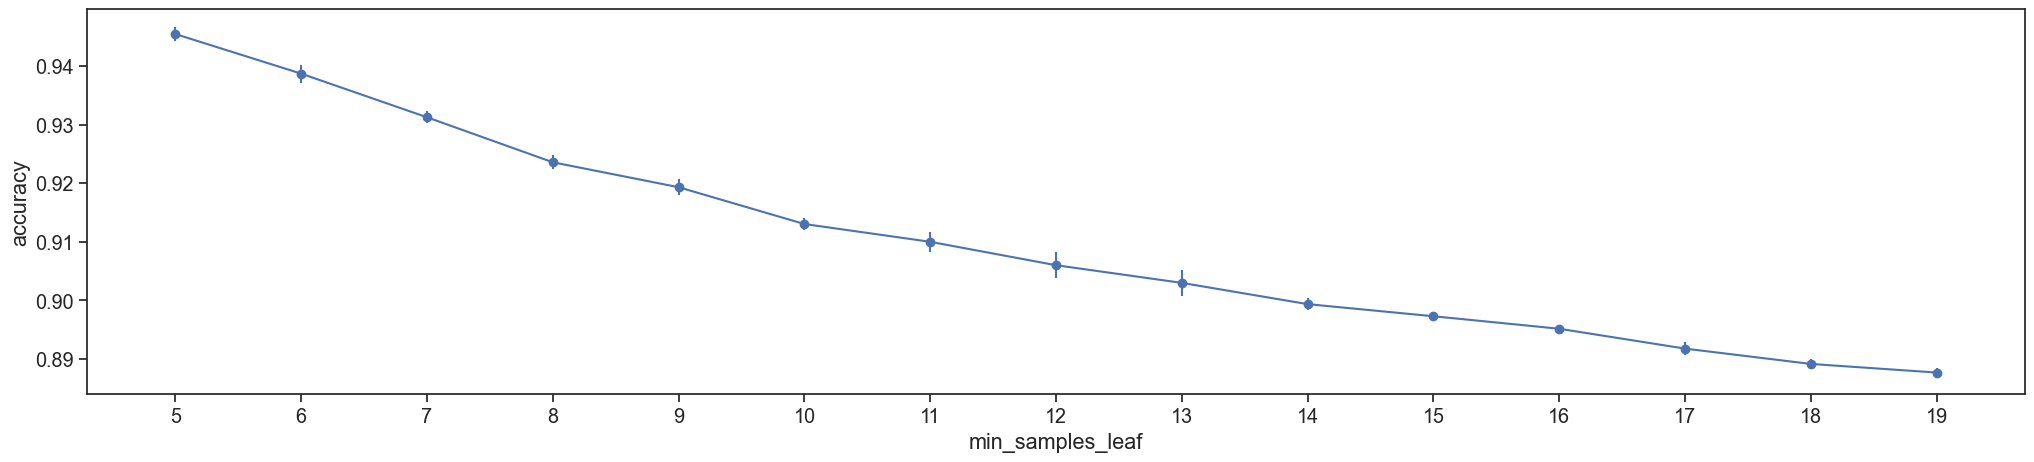

[5, 7, 9, 11, 13]


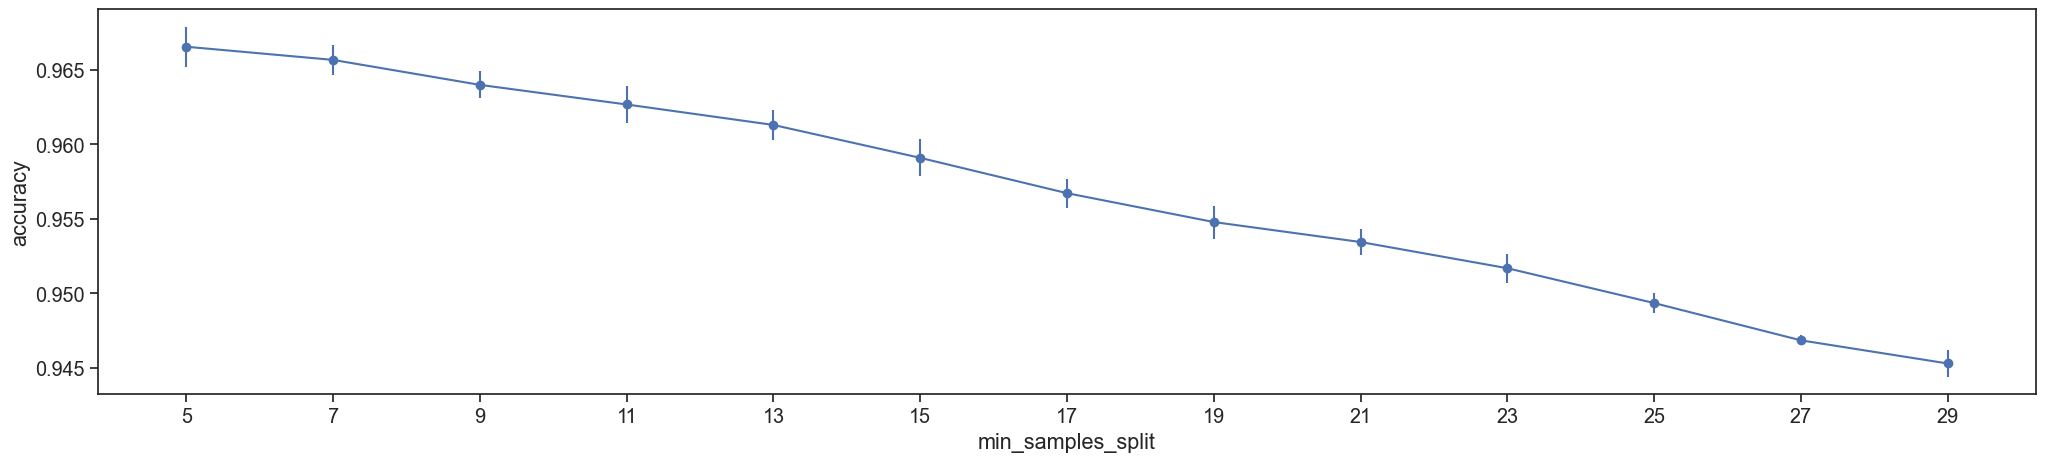

In [220]:
range_depth = depth_param_graph(interval=range(5, 20, 1), train_X=X_over, train_y=y_over, cv=5)
range_leaf = leaf_param_graph(interval=range(5, 20, 1), train_X=X_over, train_y=y_over, cv=5)
range_split = split_param_graph(interval=range(5, 30, 2), train_X=X_over, train_y=y_over, cv=5)

In [221]:
param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)
random_search.fit(X_over, y_over)
dt = random_search.best_estimator_
dt

Fitting 50 folds for each of 10 candidates, totalling 500 fits


DecisionTreeClassifier(max_depth=18, min_samples_leaf=5, min_samples_split=11)

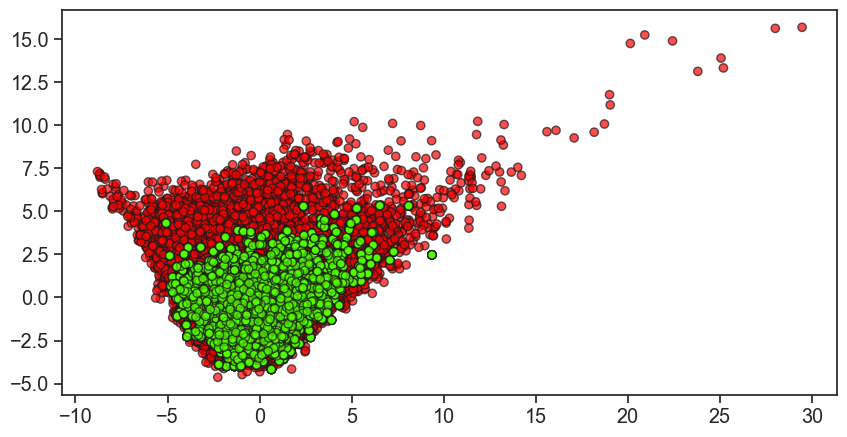

<Figure size 500x200 with 0 Axes>

In [222]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_over)
plot_pca(X_pca, y_over)

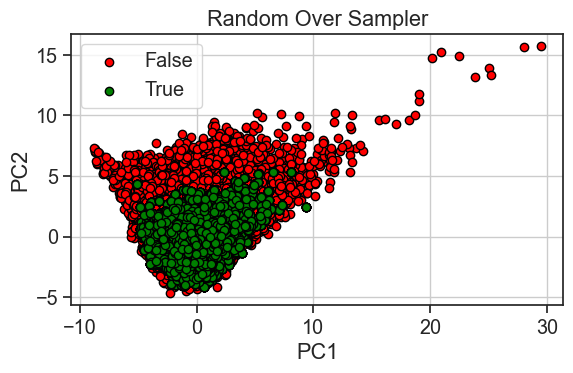

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_over)

# filter data points based on target variable (y_res)
false_data = X_pca[y_over == 0]  # assume 0 represents "False" class
true_data = X_pca[y_over == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4))  
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Random Over Sampler")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy 0.8448692693409742
F1-score [0.91096894 0.39770554]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     20400
           1       0.30      0.59      0.40      1936

    accuracy                           0.84     22336
   macro avg       0.63      0.73      0.65     22336
weighted avg       0.90      0.84      0.87     22336



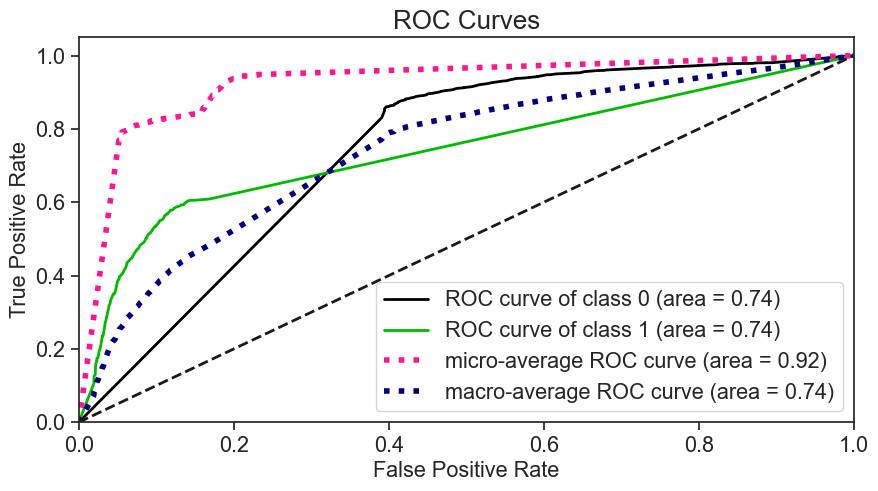

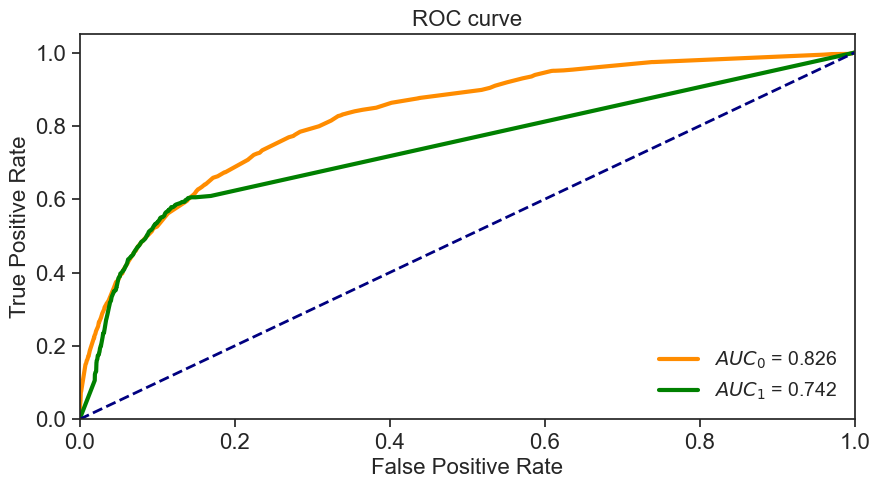

<Figure size 600x400 with 0 Axes>

In [223]:
# fit
clf = DecisionTreeClassifier(max_depth=18, min_samples_leaf=5, min_samples_split=11, random_state=42)
clf.fit(X_over, y_over)

# predict 
y_pred = clf.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

## SMOTE

In [283]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_sm))

Resampled dataset shape Counter({0: 61198, 1: 61198})


[15, 16, 17, 18, 19]


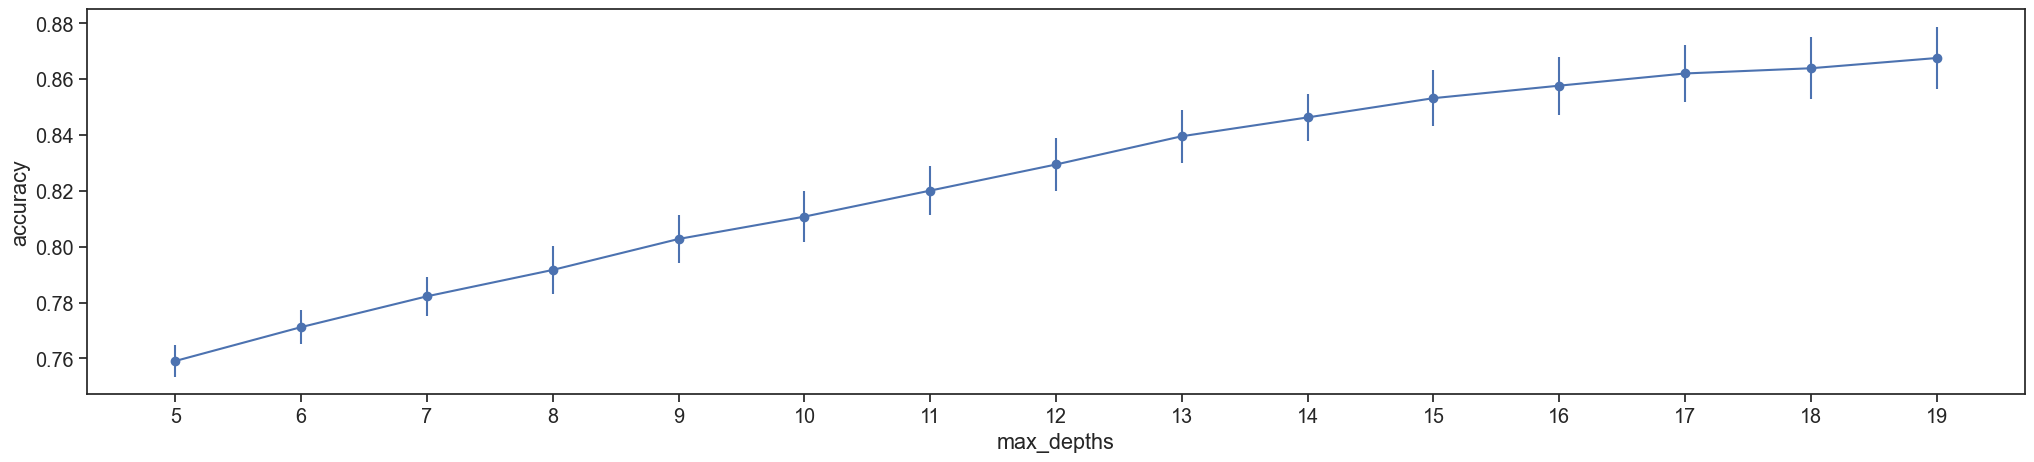

[5, 6, 7, 8, 9]


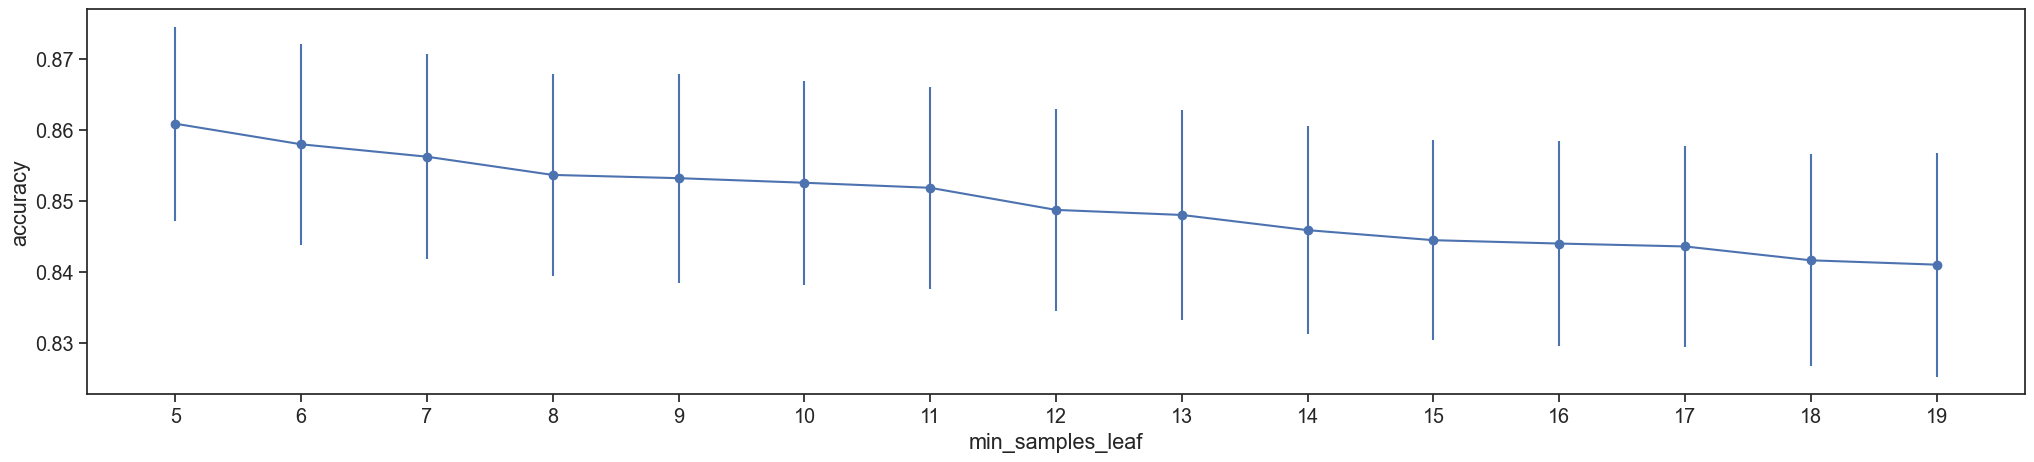

[5, 7, 9, 11, 13]


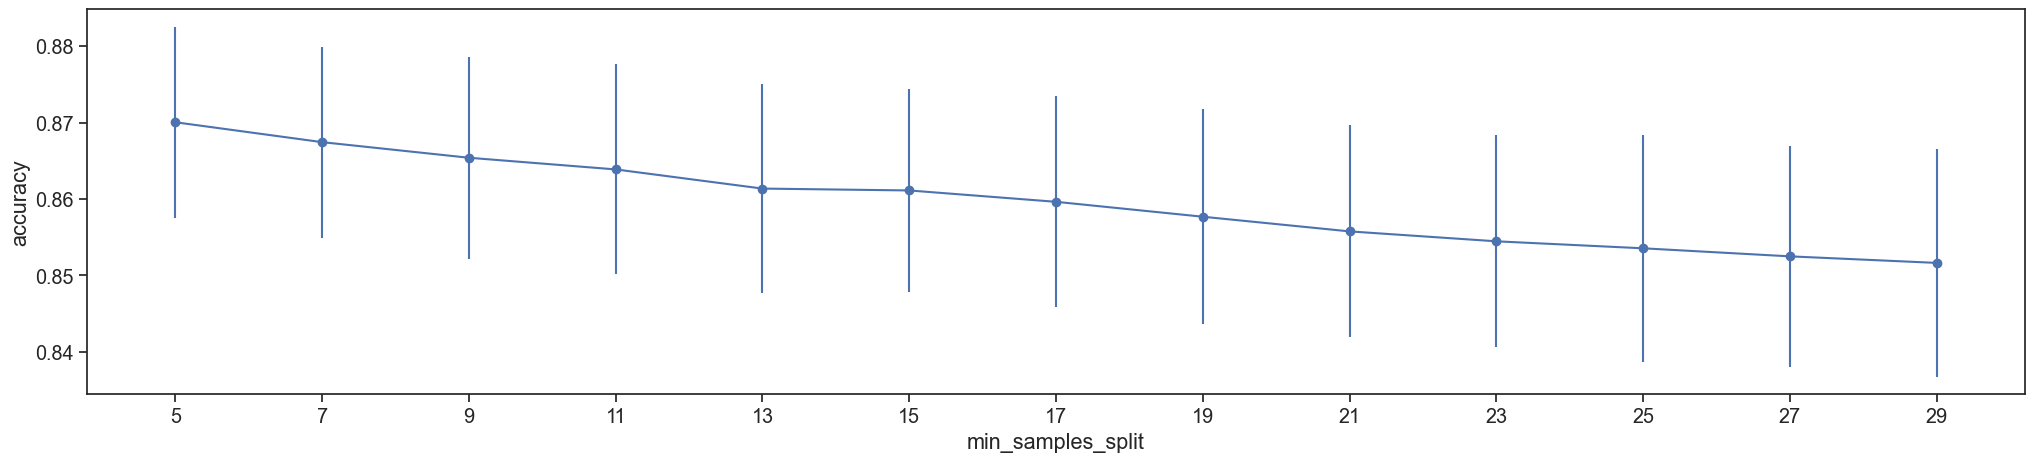

In [225]:
range_depth = depth_param_graph(interval=range(5, 20, 1), train_X=X_sm, train_y=y_sm, cv=5)
range_leaf = leaf_param_graph(interval=range(5, 20, 1), train_X=X_sm, train_y=y_sm, cv=5)
range_split = split_param_graph(interval=range(5, 30, 2), train_X=X_sm, train_y=y_sm, cv=5)

In [227]:
param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)
random_search.fit(X_sm, y_sm)
dt = random_search.best_estimator_
dt

Fitting 50 folds for each of 10 candidates, totalling 500 fits


DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=5,
                       min_samples_split=7)

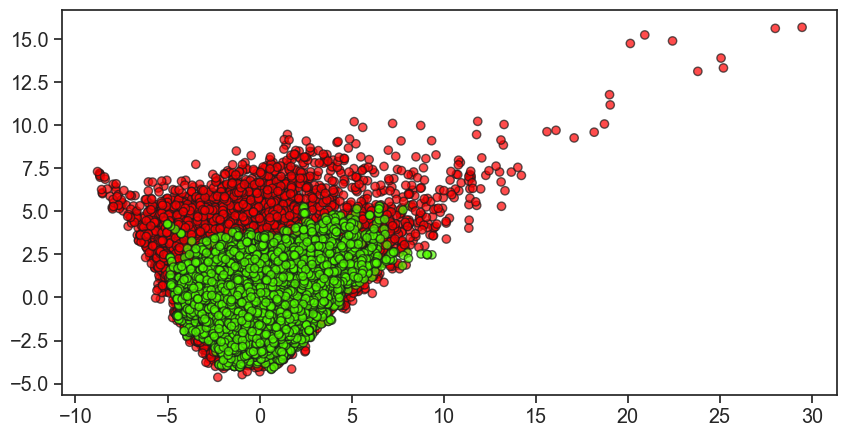

<Figure size 500x200 with 0 Axes>

In [226]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_sm)
plot_pca(X_pca, y_sm)

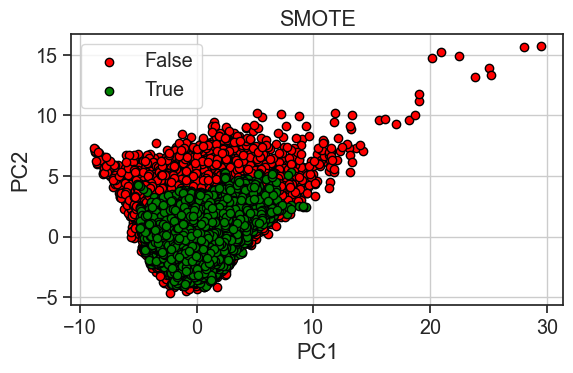

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_sm)

# filter data points based on target variable (y_res)
false_data = X_pca[y_sm == 0]  # assume 0 represents "False" class
true_data = X_pca[y_sm == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4))  
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("SMOTE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy 0.8058291547277937
F1-score [0.88586542 0.35006744]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     20400
           1       0.25      0.60      0.35      1936

    accuracy                           0.81     22336
   macro avg       0.60      0.71      0.62     22336
weighted avg       0.89      0.81      0.84     22336



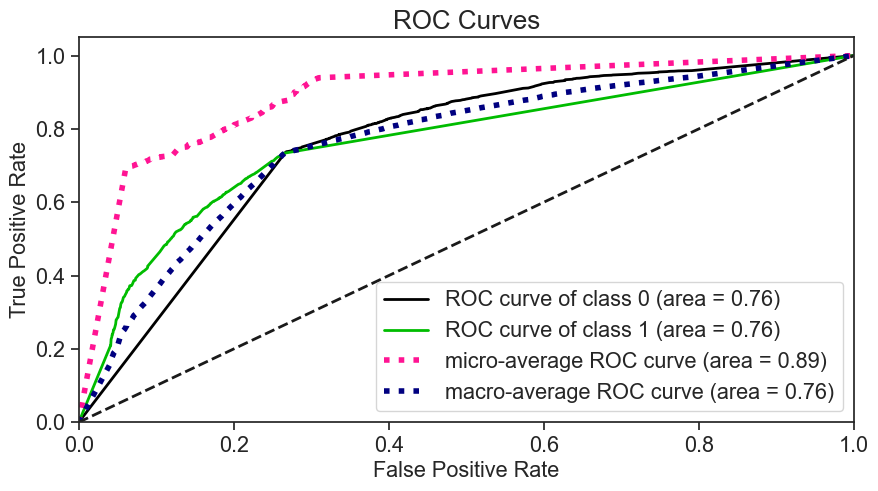

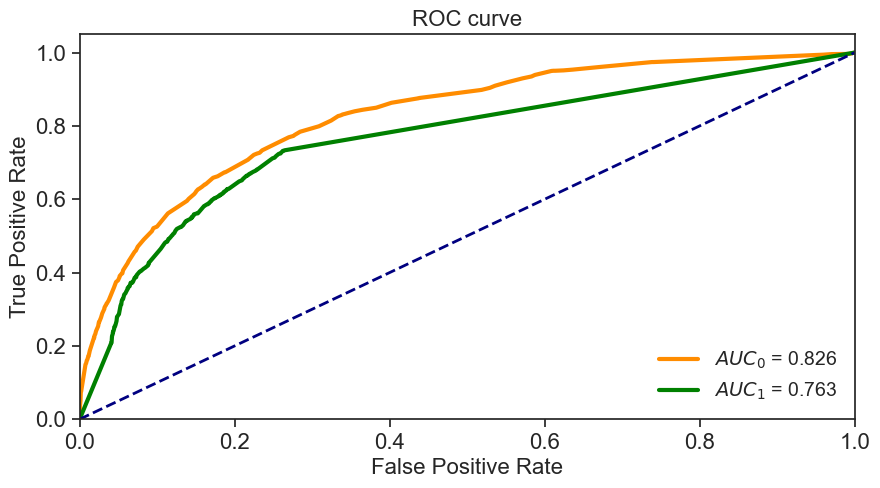

<Figure size 600x400 with 0 Axes>

In [228]:
# fit
clf = DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=5,
                       min_samples_split=7, random_state=42)
clf.fit(X_sm, y_sm)

# predict
y_pred = clf.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test_scaled)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

### ADASYN

In [288]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_ada))

Resampled dataset shape Counter({1: 61504, 0: 61198})


In [231]:
param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)
random_search.fit(X_ada, y_ada)
dt = random_search.best_estimator_
dt

Fitting 50 folds for each of 10 candidates, totalling 500 fits


DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=5,
                       min_samples_split=11)

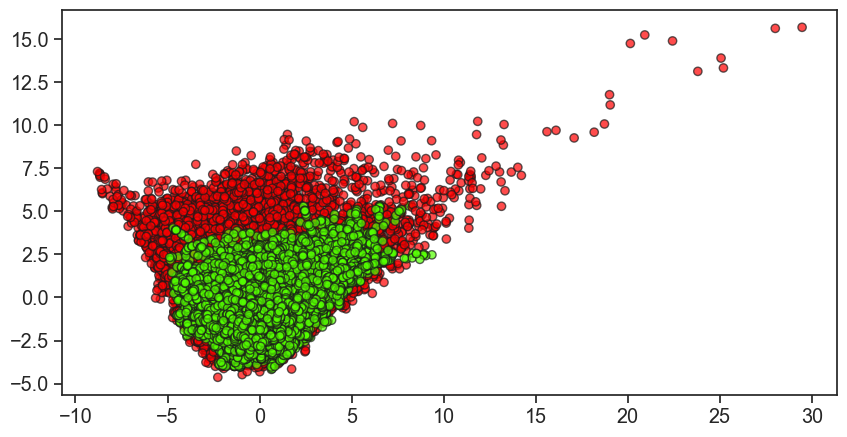

<Figure size 500x200 with 0 Axes>

In [289]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_ada)
plot_pca(X_pca, y_ada)

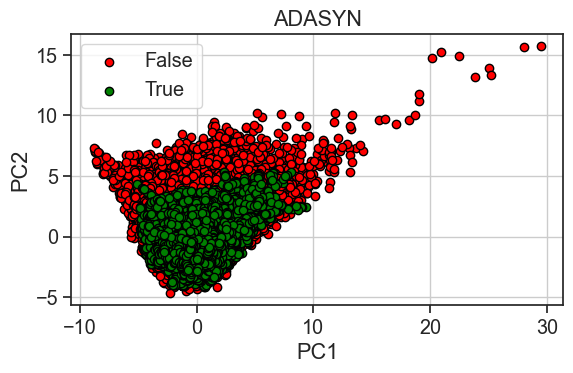

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_ada)

# filter data points based on target variable (y_res)
false_data = X_pca[y_ada == 0]  # assume 0 represents "False" class
true_data = X_pca[y_ada == 1]  # assume 1 represents "True" class

plt.figure(figsize=(6, 4)) 
plt.scatter(false_data[:, 0], false_data[:, 1], c='red',edgecolors='black', label='False')
plt.scatter(true_data[:, 0], true_data[:, 1],c='green',edgecolors='black', label='True')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("ADASYN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy 0.7916815902578797
F1-score [0.87602909 0.34822804]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     20400
           1       0.24      0.64      0.35      1936

    accuracy                           0.79     22336
   macro avg       0.60      0.72      0.61     22336
weighted avg       0.90      0.79      0.83     22336



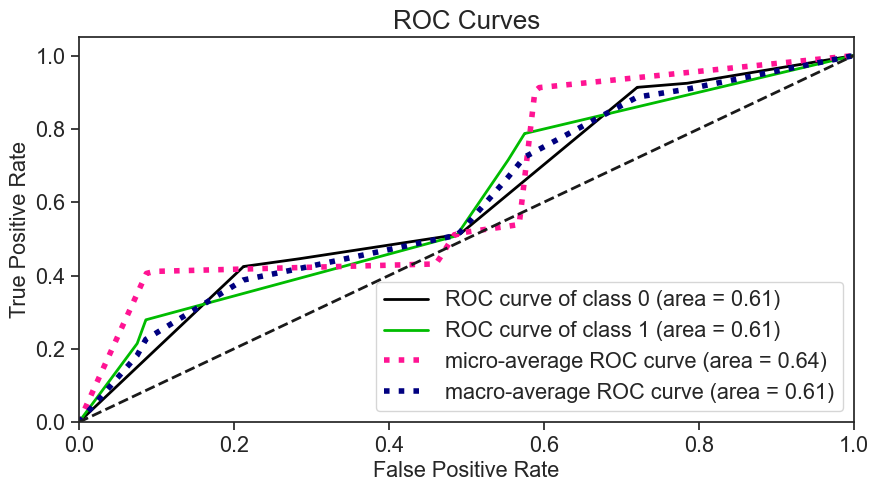

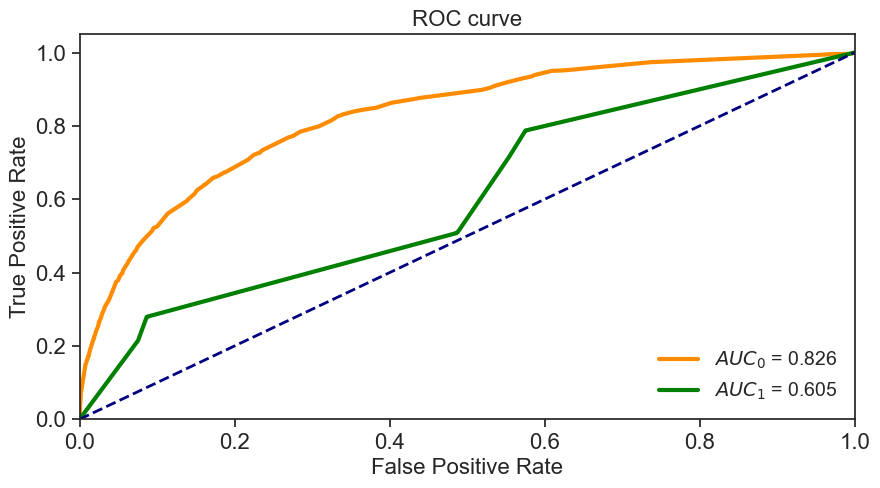

<Figure size 600x400 with 0 Axes>

In [239]:
# fit
clf = DecisionTreeClassifier( criterion='entropy', max_depth=18, min_samples_leaf=5,
                       min_samples_split=11,
                     random_state=42)
clf.fit(X_ada, y_ada)

# predict
y_pred = clf.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)